In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df_2016 = pd.read_csv("/Users/alex/Desktop/Columbia/github/data-studio-projects/code/Project_2/pension funds data and pitch/pensionskassenvergleich/tabula-anlagerenditen_2017.csv")

In [3]:
df_2013 = pd.read_csv("/Users/alex/Desktop/Columbia/github/data-studio-projects/code/Project_2/pension funds data and pitch/pensionskassenvergleich/tabula-anlagerenditen_2014.csv")

In [4]:
df_2016.Pension_fund = df_2016.Pension_fund.str.strip()

In [5]:
df_2013.Pension_fund = df_2013.Pension_fund.str.strip()

In [6]:
df_2016 = df_2016.merge(df_2013, on='Pension_fund', how='left')

# create new variable for alternatives + stock quota
df_2016['stock_alt_2016'] = df_2016.Stocks_2016 + df_2016.Alternatives_2016

In [7]:
# remove Index-Data, only funds with historic data
pf_data_historic = df_2016[~df_2016["Pension_fund"].str.contains("Pictet-Index")].dropna()

# remove Index-Data, all funds
pf_data_current = df_2016[~df_2016["Pension_fund"].str.contains("Pictet-Index")]

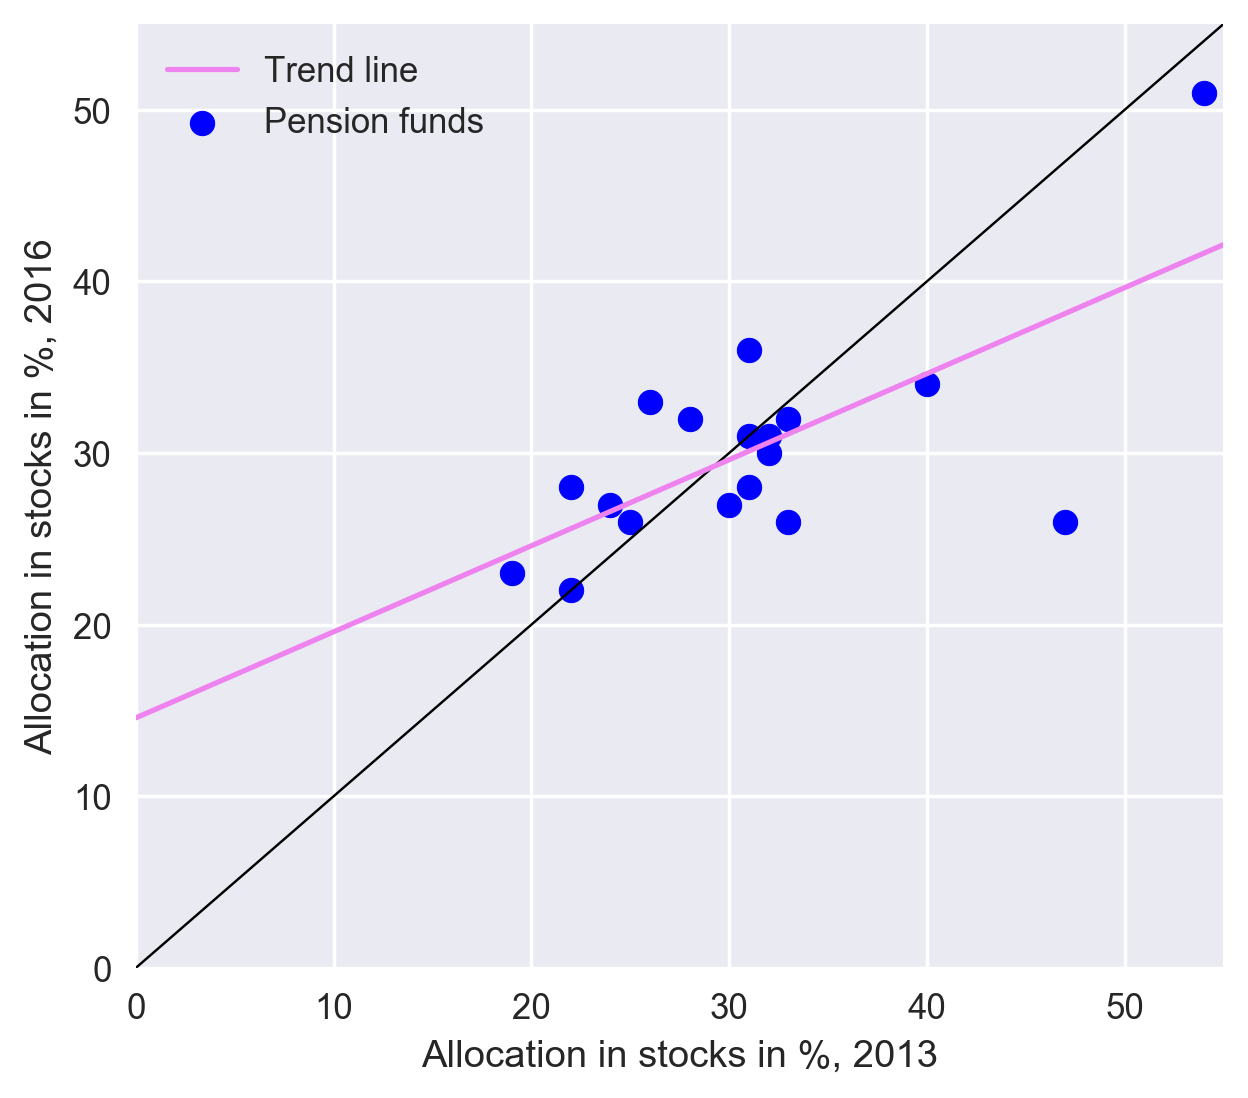

In [154]:
# compare asset allocation
plt.style.use('seaborn')
x= pf_data_historic.Stocks_2013
y= pf_data_historic.Stocks_2016
fig, ax = plt.subplots(figsize=(5,5), dpi=250)
fit = np.polyfit(x, y, deg=1)
ax.set_xlim(0,55)
ax.set_ylim(0,55)
ax.set_xlabel("Allocation in stocks in %, 2013")
ax.set_ylabel("Allocation in stocks in %, 2016")
ax.scatter(x, y, color="blue", marker="o", label = "Pension funds")
x_fit = np.arange(0,56)
y_fit = fit[1] + fit[0]*x_fit
ax.plot(x_fit, x_fit, color="black", linewidth = 0.7)
ax.plot(x_fit, y_fit, color="violet", linewidth = 1.5, label = "Trend line")
ax.legend()

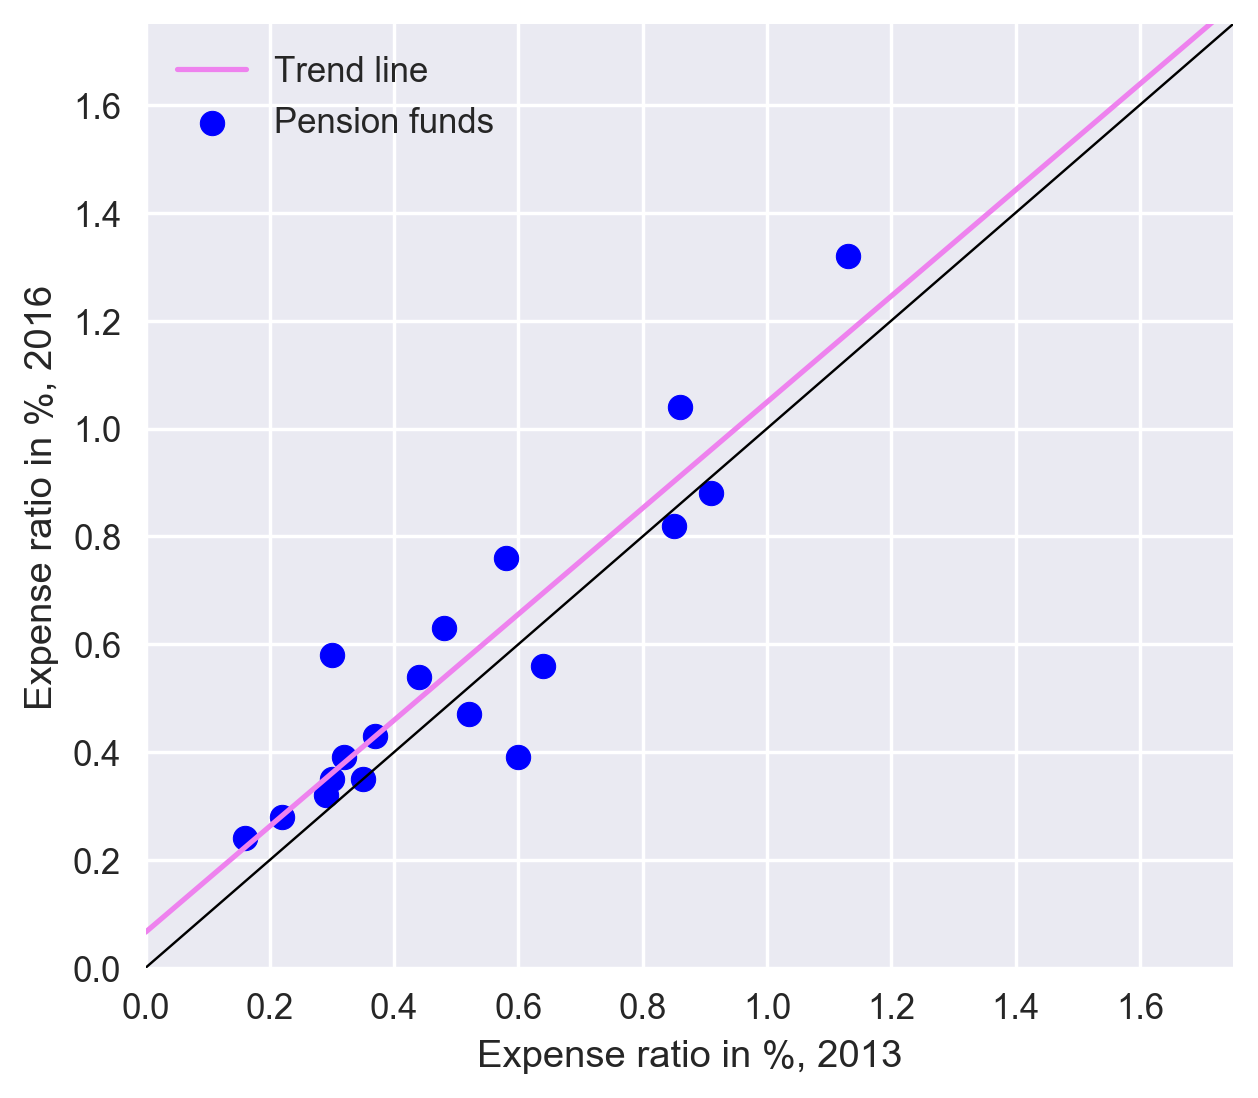

In [158]:
# compare cost changes
x= pf_data_historic.TER_2013
y= pf_data_historic.TER_2016
fig, ax = plt.subplots(figsize=(5,5), dpi=250)
fit = np.polyfit(x, y, deg=1)
ax.set_xlim(0,1.75)
ax.set_ylim(0,1.75)
ax.set_xlabel("Expense ratio in %, 2013")
ax.set_ylabel("Expense ratio in %, 2016")
ax.scatter(x, y, color="blue", marker="o", label = "Pension funds")
x_fit = np.arange(0,56)
y_fit = fit[1] + fit[0]*x_fit
ax.plot(x_fit, x_fit, color="black", linewidth = 0.7)
ax.plot(x_fit, y_fit, color="violet", linewidth = 1.5, label = "Trend line")
ax.legend()

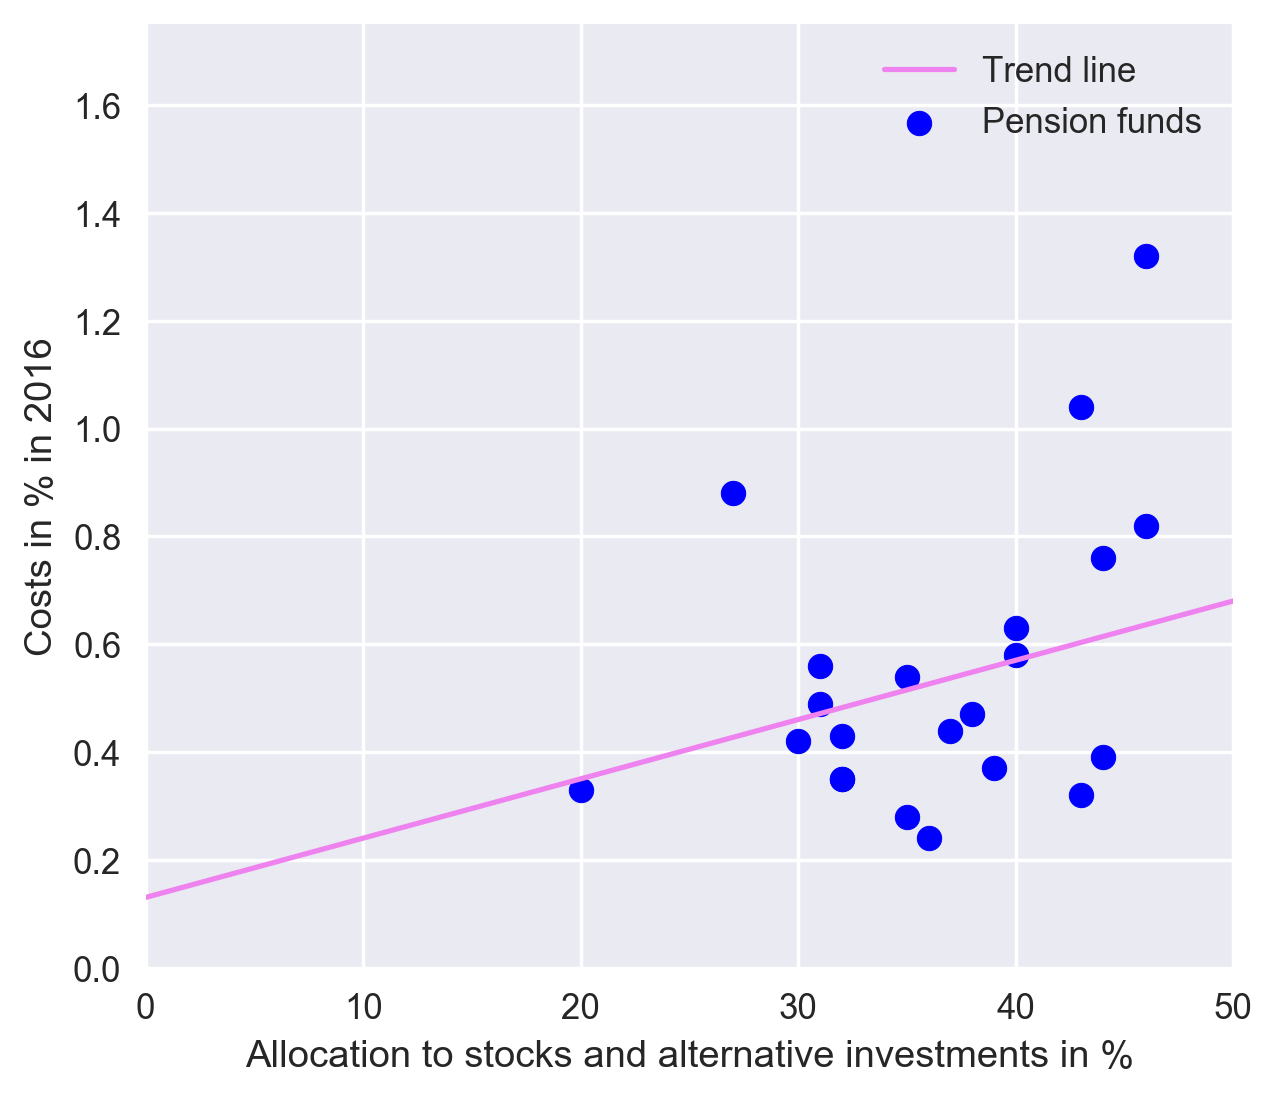

In [156]:
# compare costs and allocations
x= pf_data_current.stock_alt_2016
y= pf_data_current.TER_2016
fig, ax = plt.subplots(figsize=(5,5), dpi=250)
fit = np.polyfit(x, y, deg=1)
ax.set_xlim(0,50)
ax.set_ylim(0,1.75)
ax.set_xlabel("Allocation to stocks and alternative investments in %")
ax.set_ylabel("Costs in % in 2016")
ax.scatter(x, y, color="blue", marker="o", label = "Pension funds")
x_fit = np.arange(0,51)
y_fit = fit[1] + fit[0]*x_fit
ax.plot(x_fit, y_fit, color="violet", linewidth = 1.5, label = "Trend line")
ax.legend()

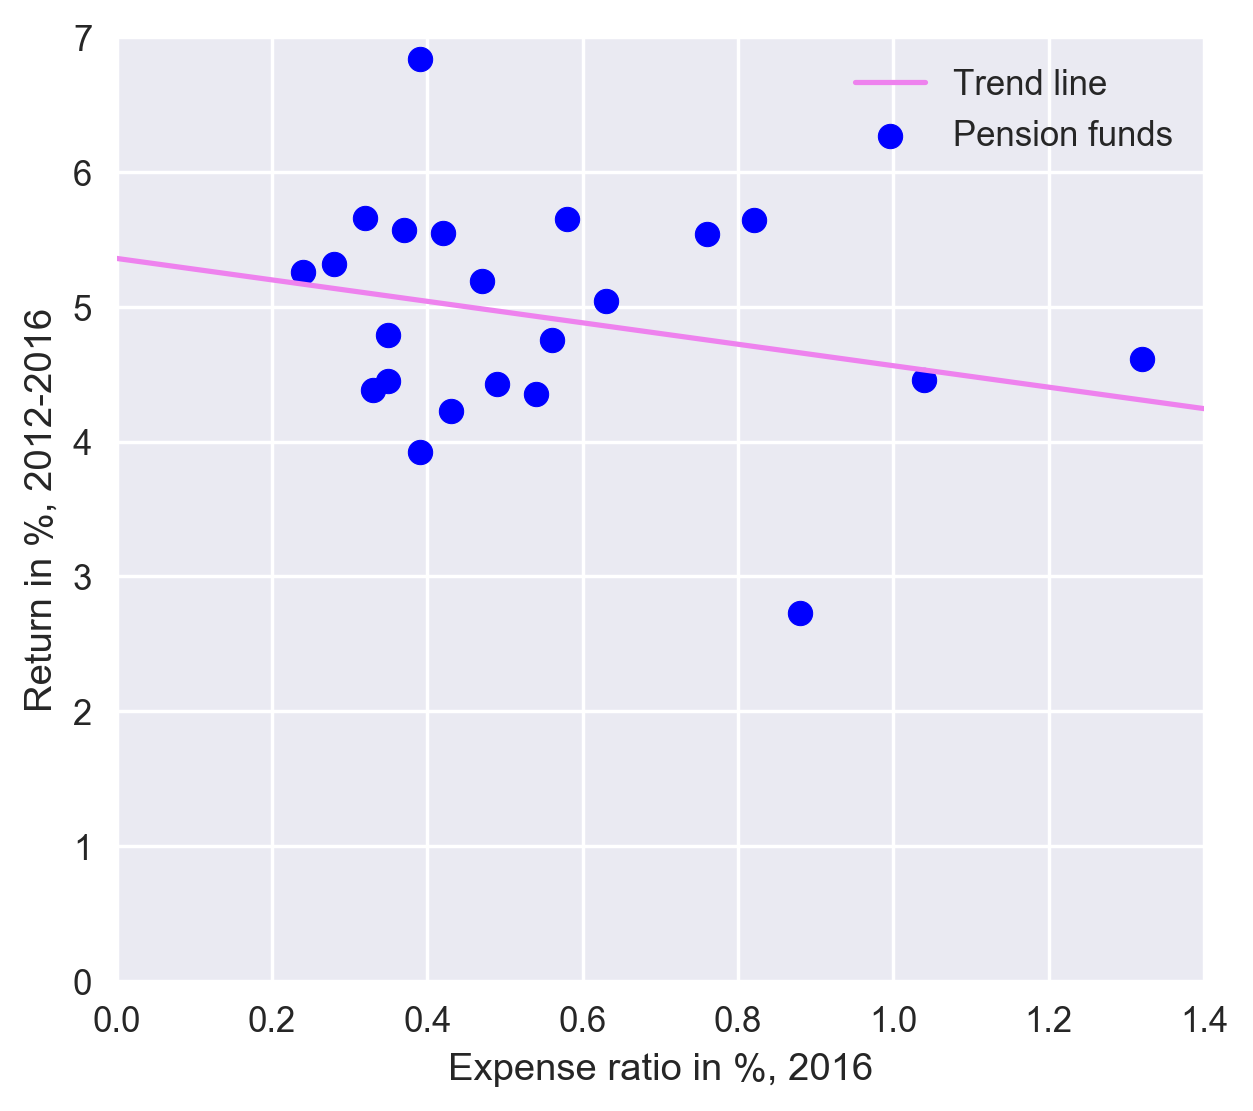

In [155]:
# compare costs and returns

#use only data with 2012 - 2016 returns
pf_data_current_with_return = pf_data_current[~pf_data_current.return_2012_2016.isnull()]

y= pf_data_current_with_return.return_2012_2016
x= pf_data_current_with_return.TER_2016
fig, ax = plt.subplots(figsize=(5,5), dpi=250)
fit = np.polyfit(x, y, deg=1)
ax.set_xlim(0,1.4)
ax.set_ylim(0,7)
ax.set_ylabel("Return in %, 2012-2016")
ax.set_xlabel("Expense ratio in %, 2016")
ax.scatter(x, y, color="blue", marker="o", label = "Pension funds")
x_fit = np.arange(0,50)
y_fit = fit[1] + fit[0]*x_fit
ax.plot(x_fit, y_fit, color="violet", linewidth = 1.5, label = "Trend line")
ax.legend()

In [47]:
df_2016[df_2016["Pension_fund"].str.contains("Pictet-Index 25")]["return_2012_2016"]

3    5.27
Name: return_2012_2016, dtype: float64

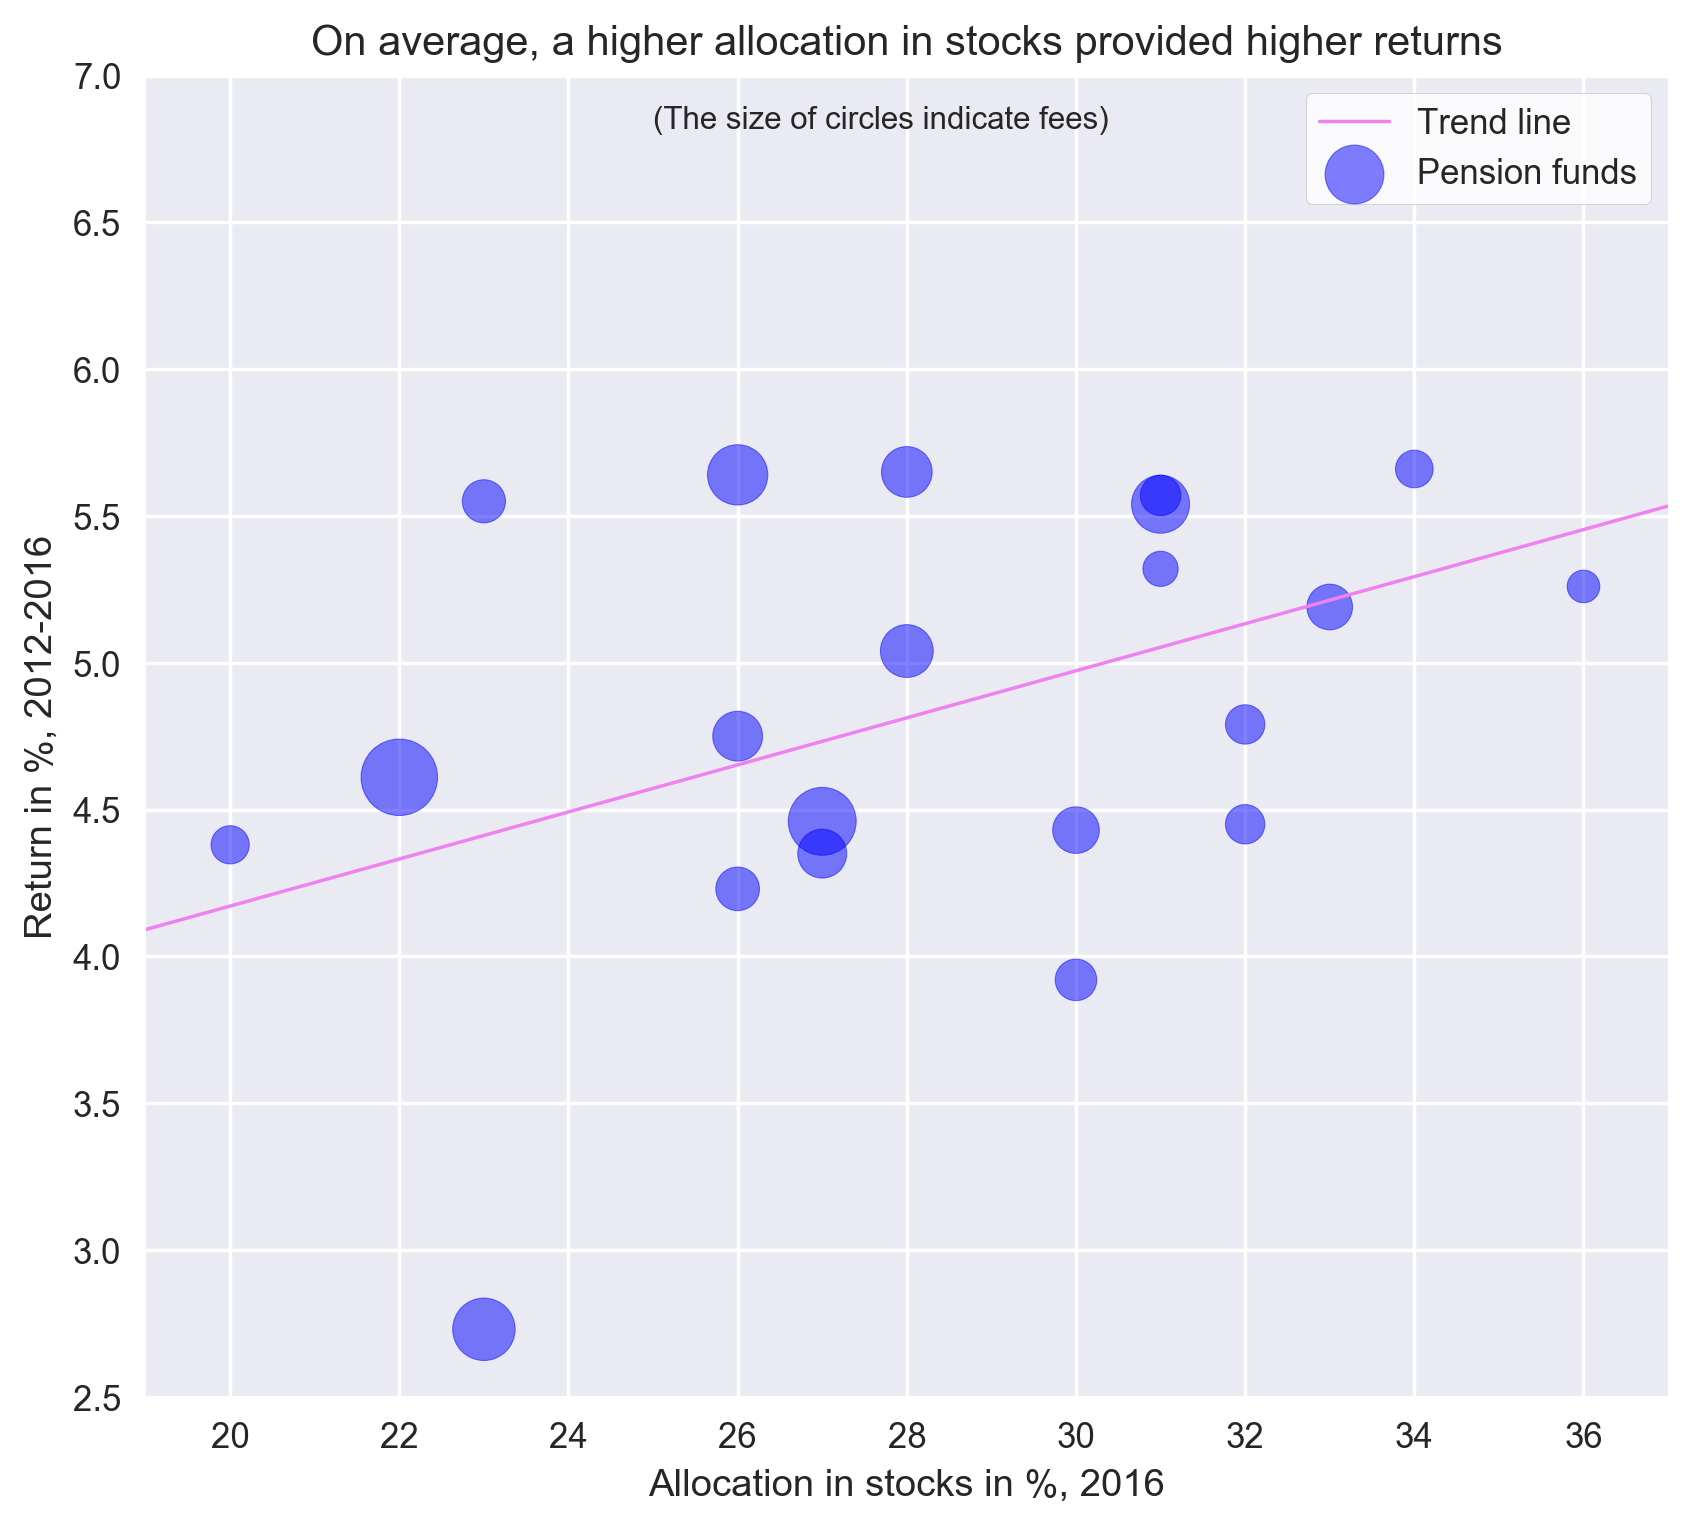

In [300]:
# allocation, returns and fees

y= pf_data_current_with_return.return_2012_2016
x= pf_data_current_with_return.Stocks_2016

costs = pf_data_current_with_return.TER_2016
mean_costs = pf_data_current_with_return.TER_2016.mean()

size_marker = (costs / mean_costs) * 2
mean1= pf_data_current_with_return.return_2012_2016

index_return = float(df_2016[df_2016["Pension_fund"]\
                       .str.contains("Pictet-Index 25")]\
                       ["return_2012_2016"].astype(float))
    
index_alloc = 25

fig, ax = plt.subplots(figsize=(7,7), dpi=250)


ax.set_xlim(19,37)
ax.set_ylim(2.5,7)

ax.set_ylabel("Return in %, 2012-2016")
ax.set_xlabel("Allocation in stocks in %, 2016")
ax.scatter(x, y, color="blue", marker="o", \
           label = "Pension funds", s = size_marker*100, alpha=0.5)

fit = np.polyfit(x, y, deg=1)
x_fit = np.arange(0,50)
y_fit = fit[1] + fit[0]*x_fit

ax.plot(x_fit, y_fit, color="violet", linewidth = 1, label = "Trend line")

plt.title("On average, a higher allocation in stocks provided higher returns")
plt.figtext(.5,.85,'(The size of circles indicate fees)',fontsize=9,ha='center')

legend = ax.legend(frameon = 1)
frame = legend.get_frame()
frame.set_facecolor('white')

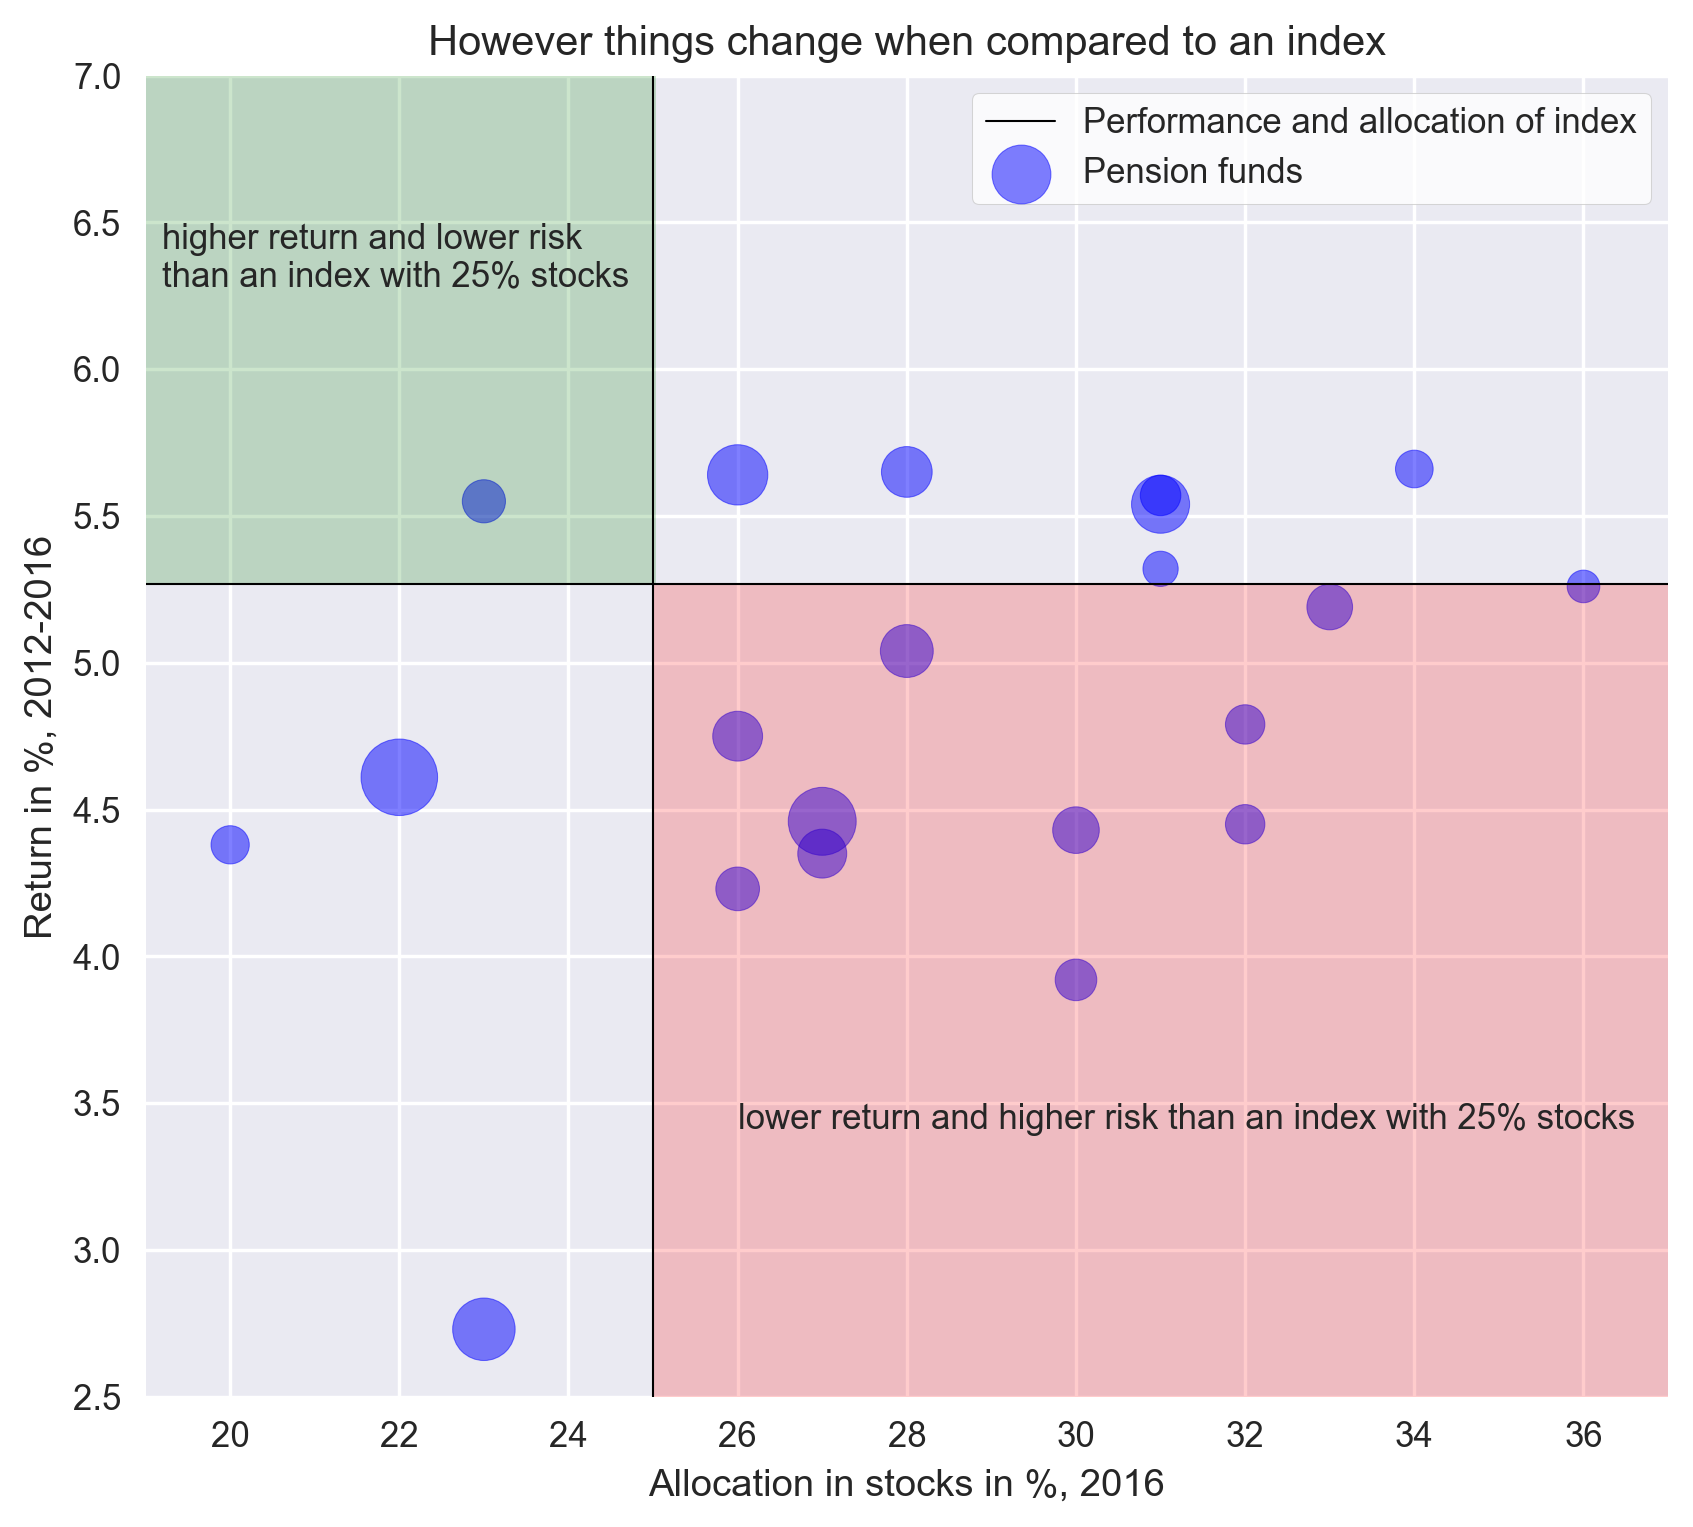

In [301]:
# allocation, returns and fees

y= pf_data_current_with_return.return_2012_2016
x= pf_data_current_with_return.Stocks_2016

costs = pf_data_current_with_return.TER_2016
mean_costs = pf_data_current_with_return.TER_2016.mean()

size_marker = (costs / mean_costs) * 2
mean1= pf_data_current_with_return.return_2012_2016

index_return = float(df_2016[df_2016["Pension_fund"]\
                       .str.contains("Pictet-Index 25")]\
                       ["return_2012_2016"].astype(float))
    
index_alloc = 25

fig, ax = plt.subplots(figsize=(7,7), dpi=250)


ax.set_xlim(19,37)
ax.set_ylim(2.5,7)

ax.set_ylabel("Return in %, 2012-2016")
ax.set_xlabel("Allocation in stocks in %, 2016")
ax.scatter(x, y, color="blue", marker="o", \
           label = "Pension funds", s = size_marker*100, alpha=0.5)

fit = np.polyfit(x, y, deg=1)
x_fit = np.arange(0,50)
y_fit = fit[1] + fit[0]*x_fit
ax.fill_between([index_alloc,max(x_fit)], [index_return,index_return], alpha=0.2, color = "red")

plt.axhspan(index_return, 7, 0, 0.335, facecolor='green', alpha=0.2)

ax.plot([15,40], [index_return,index_return], color = "black", linewidth = 0.6, label="Performance and allocation of index")
ax.plot([index_alloc,index_alloc], [2,7], color = "black", linewidth = 0.6)

ax.text(26, 3.5,\
        "lower return and higher risk than an index with 25% stocks",
        horizontalalignment='left',
        verticalalignment='top')

ax.text(19.2, 6.5,\
        "higher return and lower risk \nthan an index with 25% stocks",
        horizontalalignment='left',
        verticalalignment='top')

plt.title("However things change when compared to an index")

legend = ax.legend(frameon = 1)
frame = legend.get_frame()
frame.set_facecolor('white')

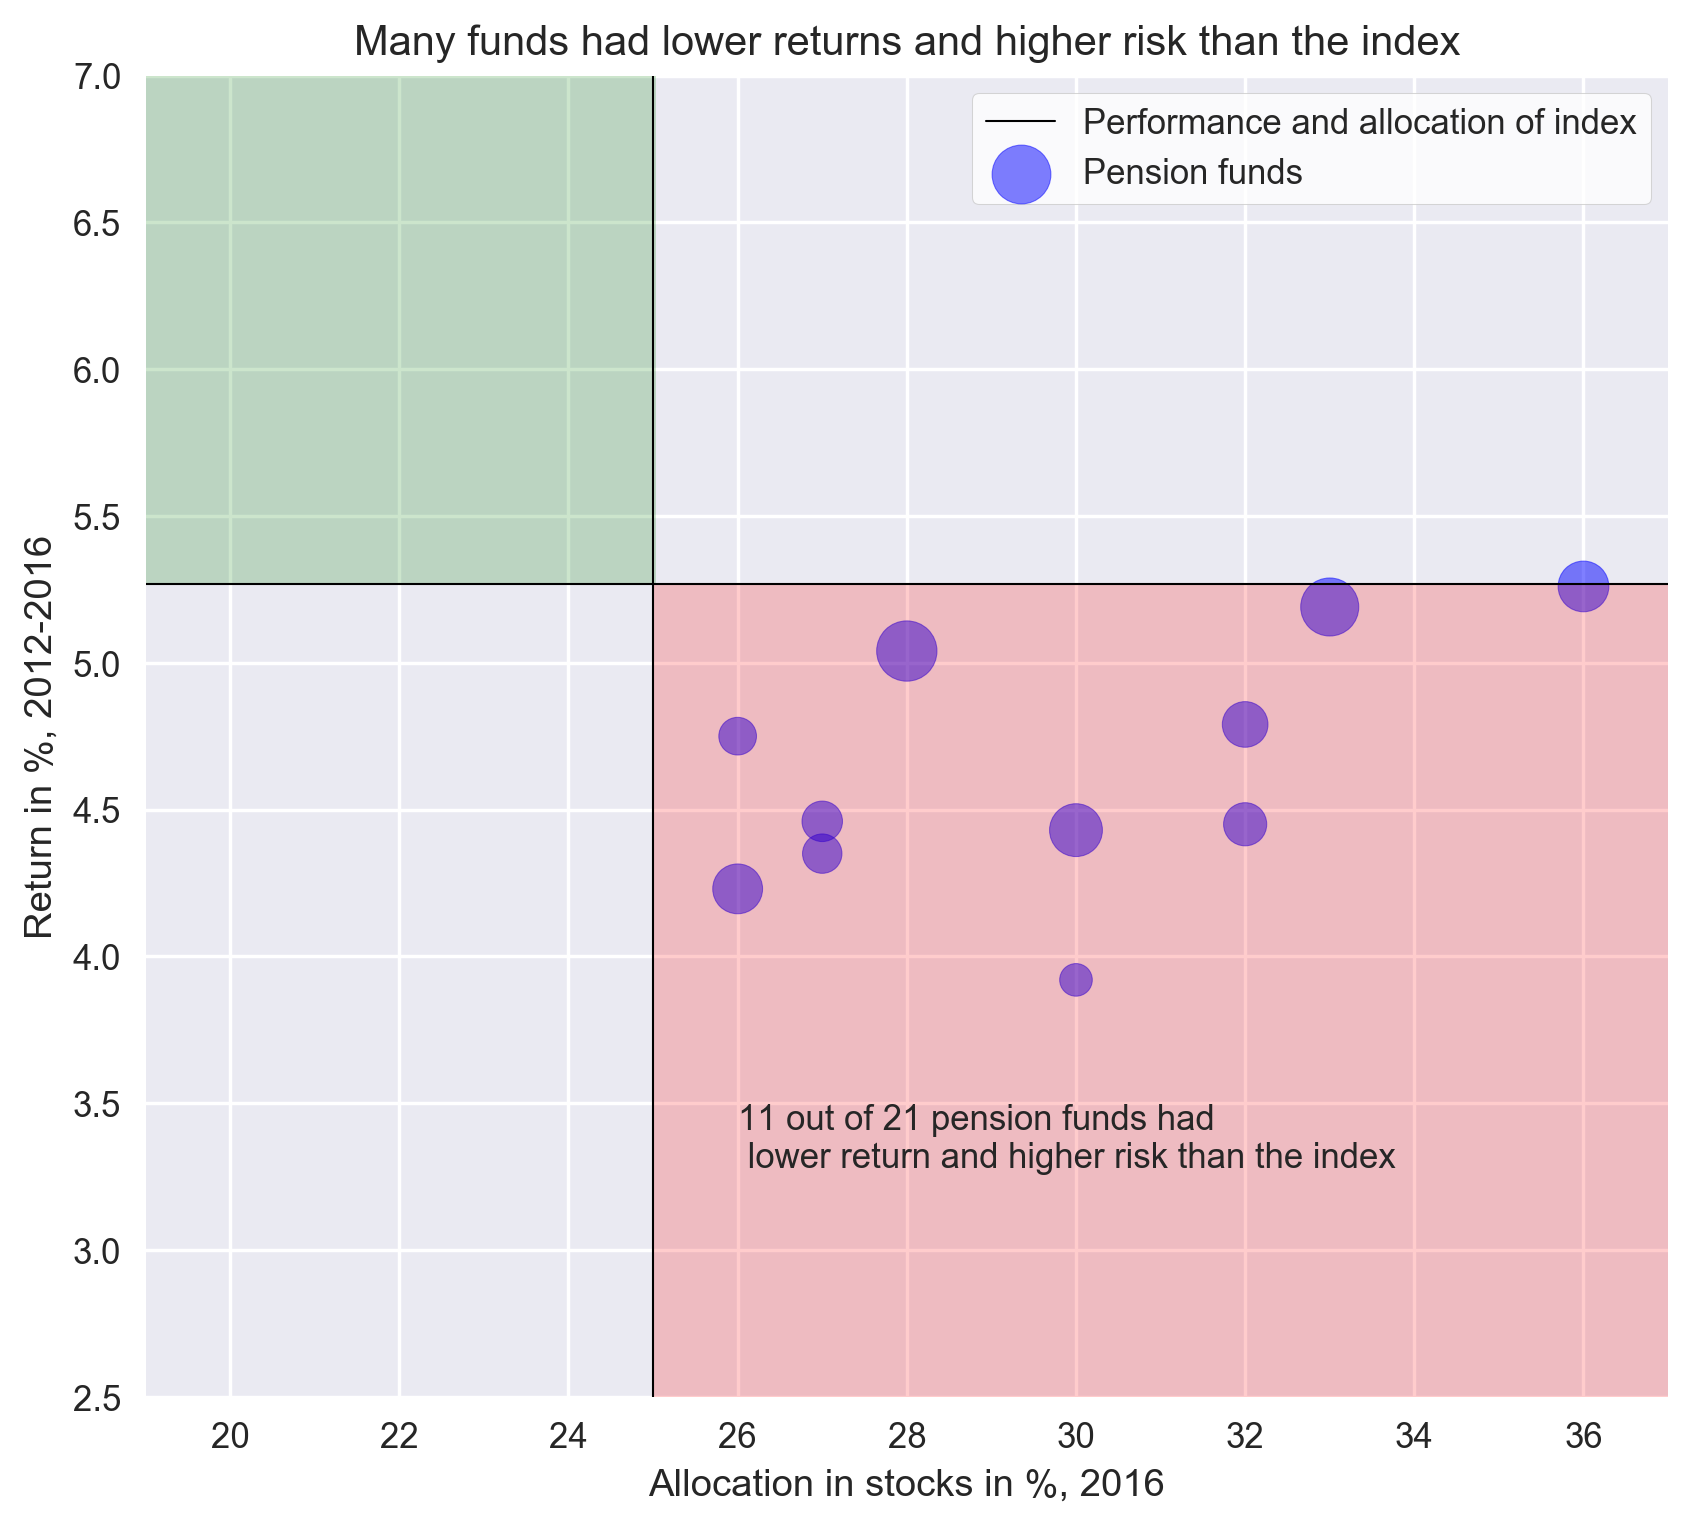

In [302]:
# allocation, returns and fees
# funds with higher than risk and lower return


costs = pf_data_current_with_return.TER_2016
mean_costs = pf_data_current_with_return.TER_2016.mean()

size_marker = (costs / mean_costs) * 2
mean1= pf_data_current_with_return.return_2012_2016

index_return = float(df_2016[df_2016["Pension_fund"]\
                       .str.contains("Pictet-Index 25")]\
                       ["return_2012_2016"].astype(float))
    
index_alloc = 25

this_data = pf_data_current_with_return\
[(pf_data_current_with_return.return_2012_2016.astype(float) < index_return) &
(pf_data_current_with_return.Stocks_2016.astype(float) > index_alloc)]

y= this_data.return_2012_2016
x= this_data.Stocks_2016


fig, ax = plt.subplots(figsize=(7,7), dpi=250)


ax.set_xlim(19,37)
ax.set_ylim(2.5,7)

ax.set_ylabel("Return in %, 2012-2016")
ax.set_xlabel("Allocation in stocks in %, 2016")
ax.scatter(x, y, color="blue", marker="o", \
           label = "Pension funds", s = size_marker*100, alpha=0.5)
ax.text(26, 3.5,\
        "11 out of 21 pension funds had \n lower return and higher risk than the index",
        horizontalalignment='left',
        verticalalignment='top')

ax.fill_between([index_alloc,max(x_fit)], [index_return,index_return], alpha=0.2, color = "red")

plt.axhspan(index_return, 7, 0, 0.335, facecolor='green', alpha=0.2)

ax.plot([15,40], [index_return,index_return], color = "black", linewidth = 0.6, label="Performance and allocation of index")
ax.plot([index_alloc,index_alloc], [2,7], color = "black", linewidth = 0.6)

plt.title("Many funds had lower returns and higher risk than the index")

legend = ax.legend(frameon = 1)
frame = legend.get_frame()
frame.set_facecolor('white')

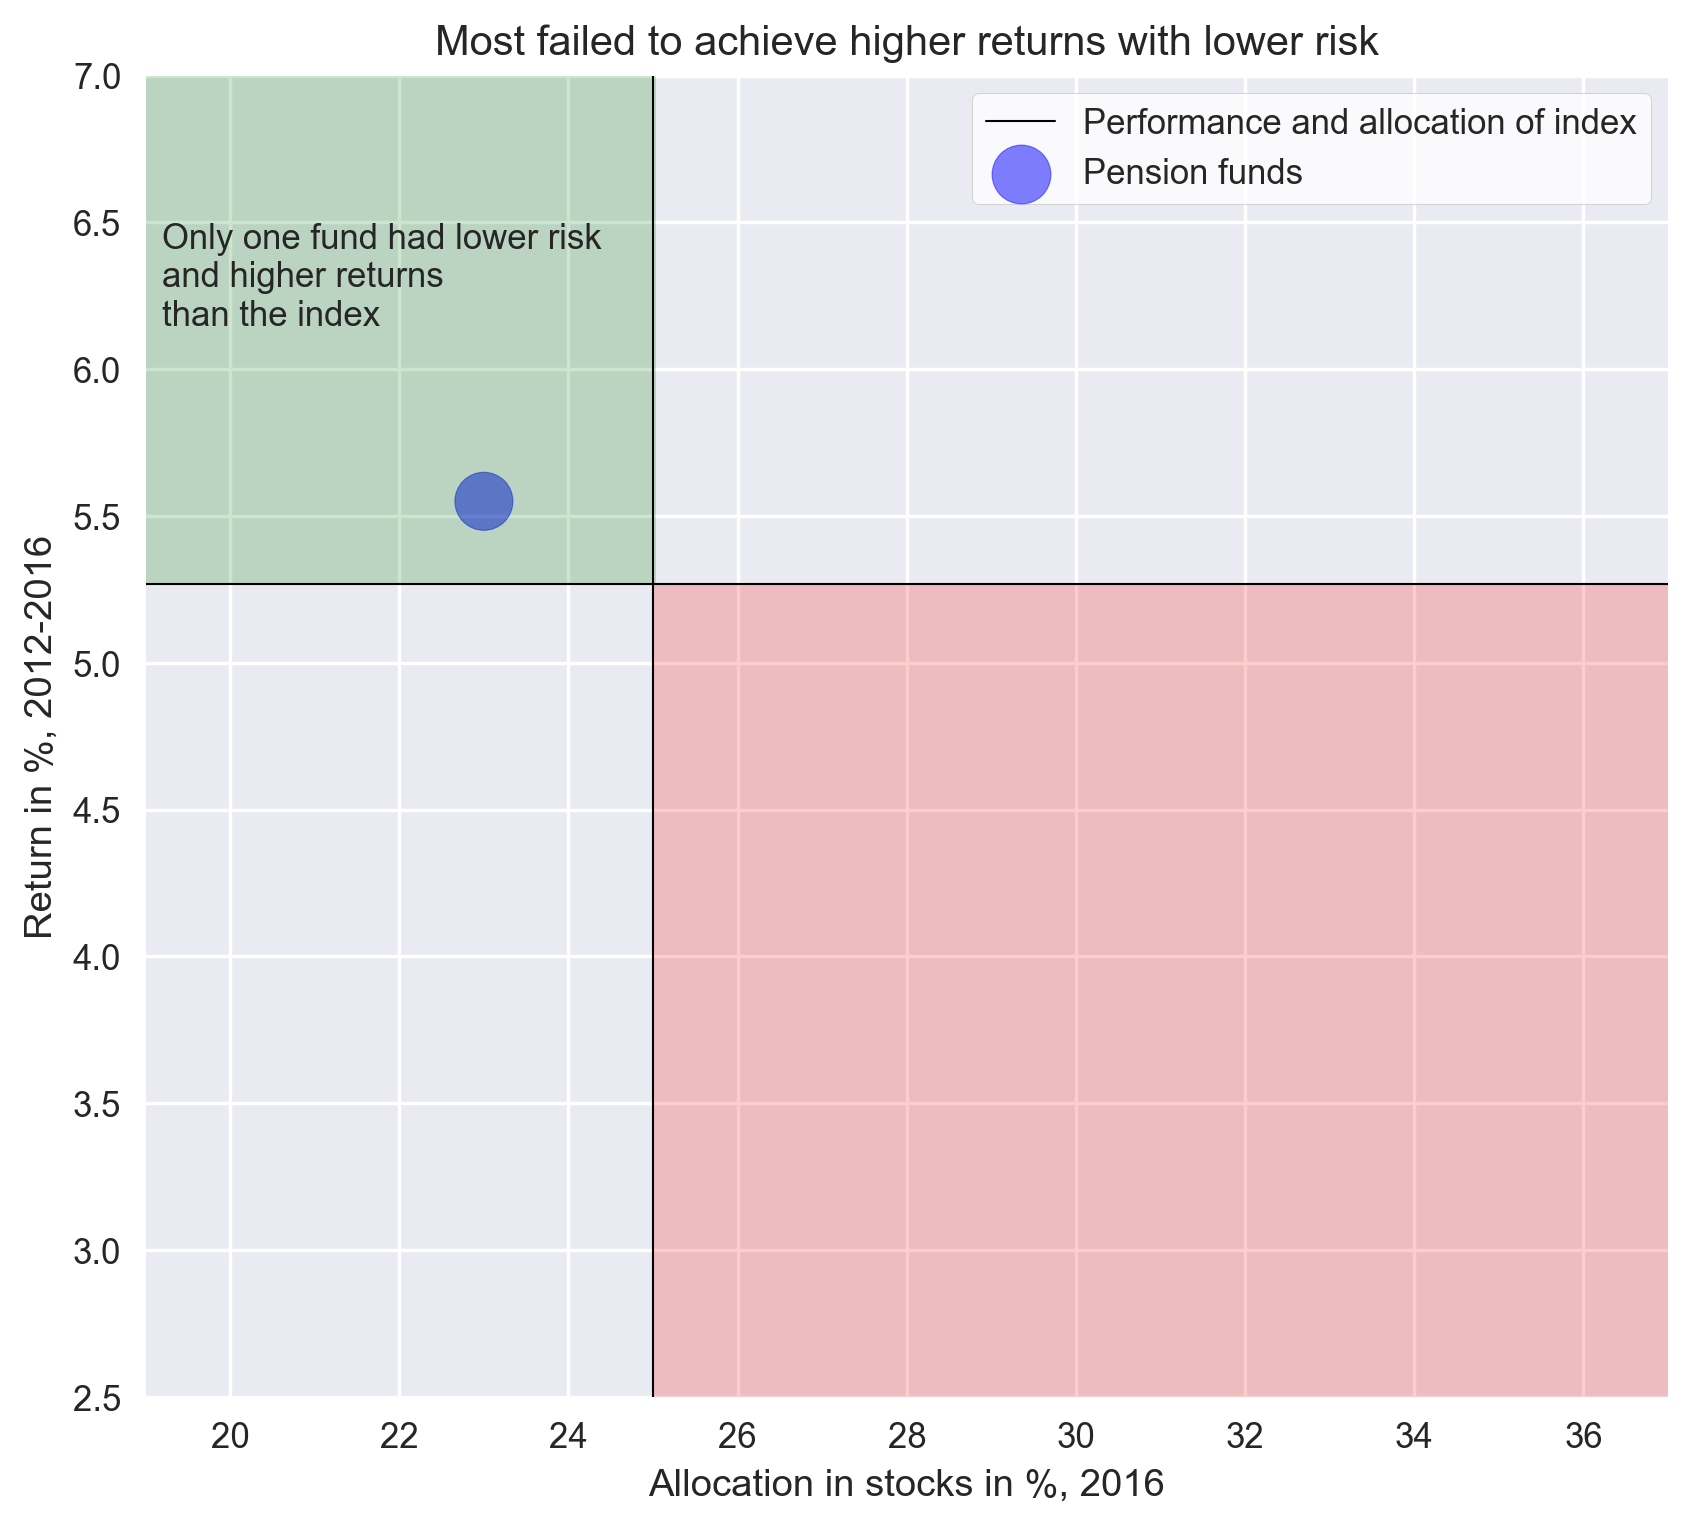

In [303]:
# allocation, returns and fees
# funds with higher than risk and lower return


costs = pf_data_current_with_return.TER_2016
mean_costs = pf_data_current_with_return.TER_2016.mean()

size_marker = (costs / mean_costs) * 2
mean1= pf_data_current_with_return.return_2012_2016

index_return = float(df_2016[df_2016["Pension_fund"]\
                       .str.contains("Pictet-Index 25")]\
                       ["return_2012_2016"].astype(float))
    
index_alloc = 25

this_data = pf_data_current_with_return\
[(pf_data_current_with_return.return_2012_2016.astype(float) > index_return) &
(pf_data_current_with_return.Stocks_2016.astype(float) < index_alloc)]

y= this_data.return_2012_2016
x= this_data.Stocks_2016


fig, ax = plt.subplots(figsize=(7,7), dpi=250)


ax.set_xlim(19,37)
ax.set_ylim(2.5,7)

ax.set_ylabel("Return in %, 2012-2016")
ax.set_xlabel("Allocation in stocks in %, 2016")
ax.scatter(x, y, color="blue", marker="o", \
           label = "Pension funds", s = size_marker*100, alpha=0.5)


ax.fill_between([index_alloc,max(x_fit)], [index_return,index_return], alpha=0.2, color = "red")

plt.axhspan(index_return, 7, 0, 0.335, facecolor='green', alpha=0.2)


ax.plot([15,40], [index_return,index_return], color = "black", linewidth = 0.6, label="Performance and allocation of index")
ax.plot([index_alloc,index_alloc], [2,7], color = "black", linewidth = 0.6)

ax.text(19.2, 6.5,\
        "Only one fund had lower risk\nand higher returns\nthan the index",
        horizontalalignment='left',
        verticalalignment='top')


plt.title("Most failed to achieve higher returns with lower risk")

legend = ax.legend(frameon = 1)
frame = legend.get_frame()
frame.set_facecolor('white')

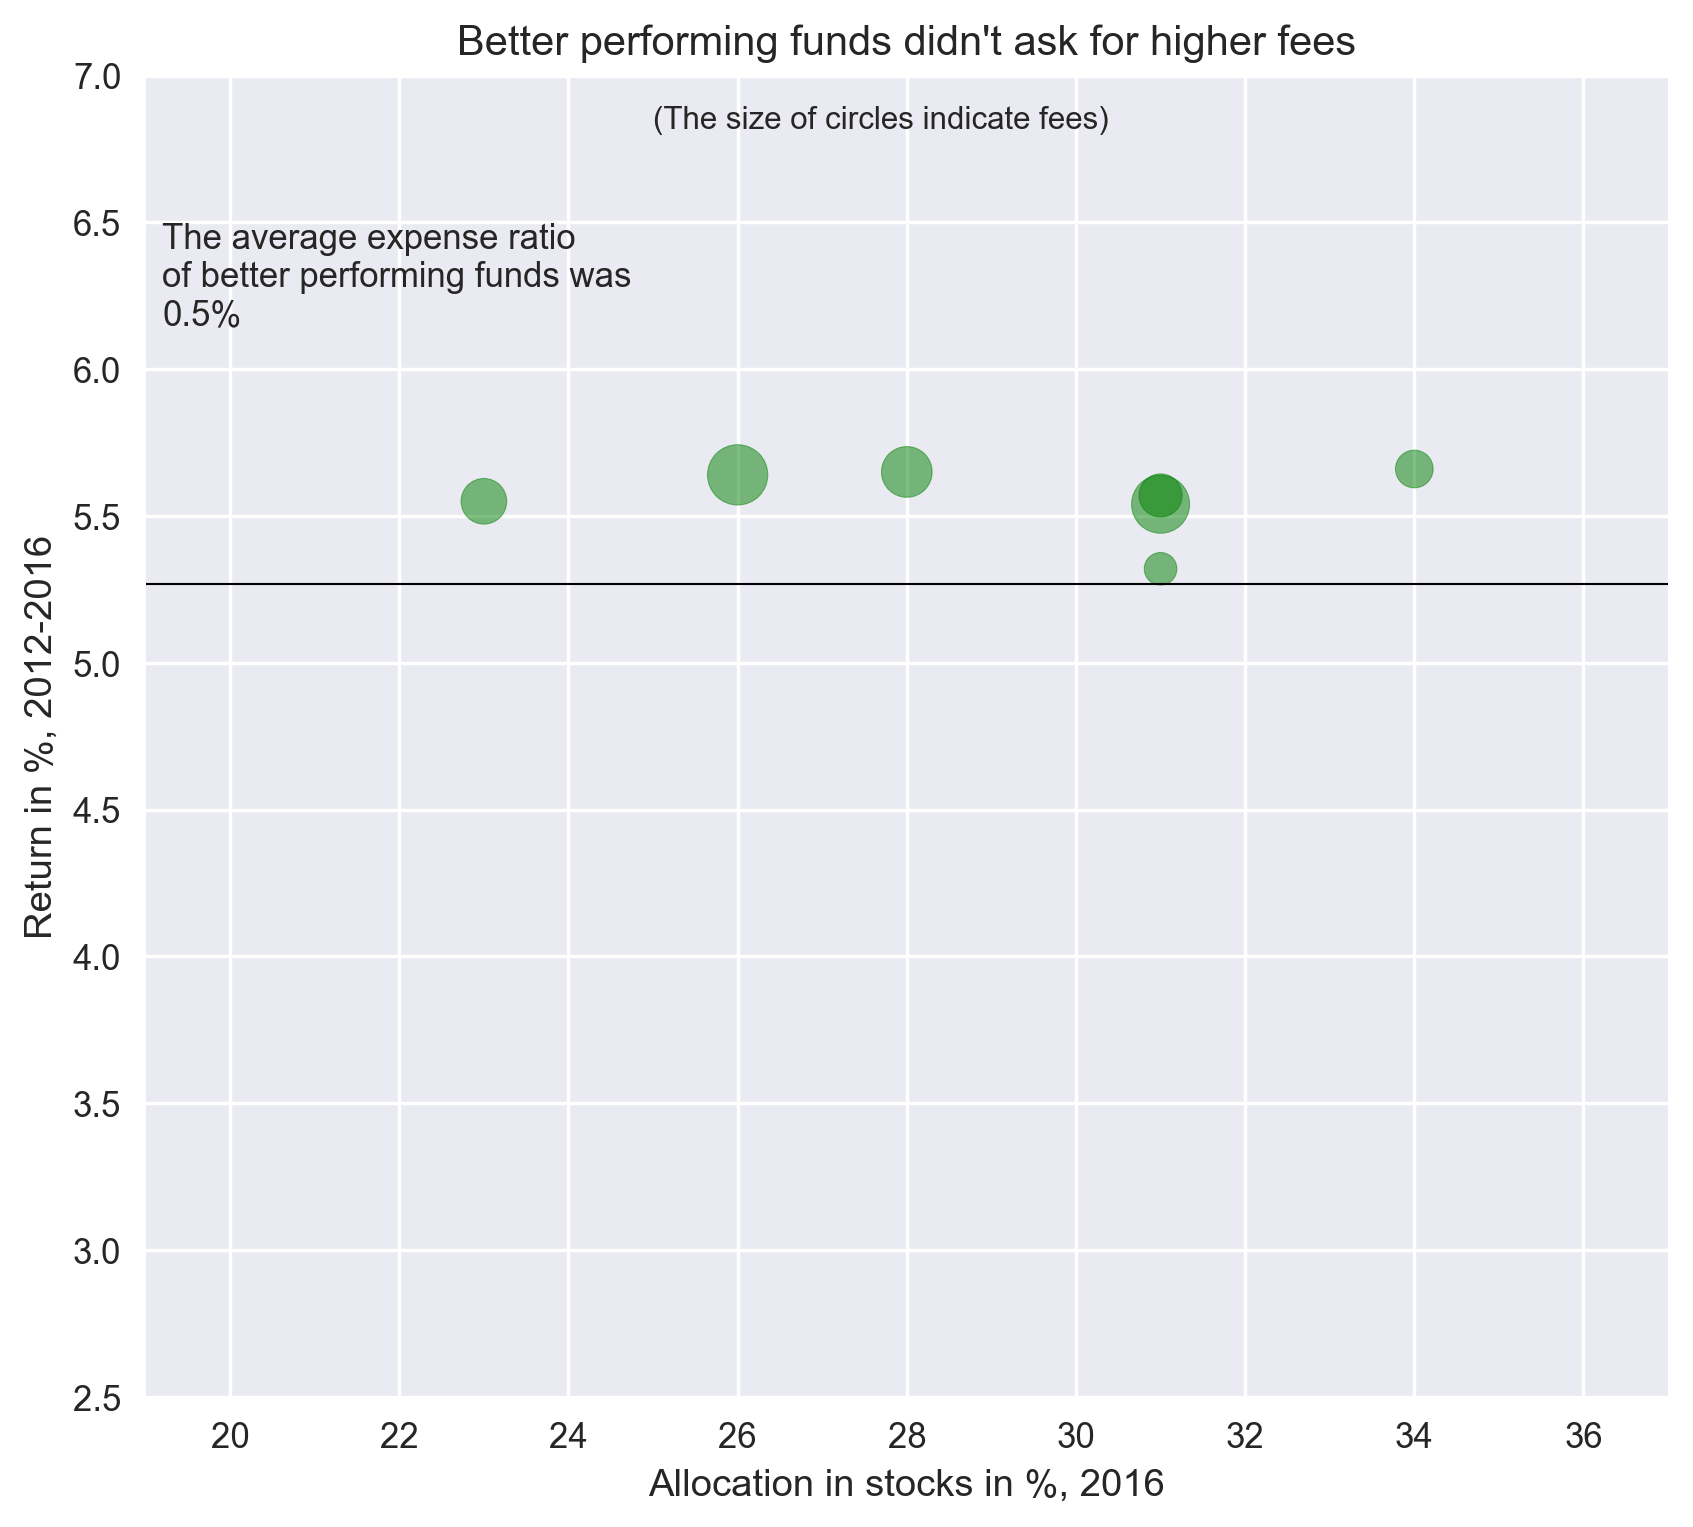

In [234]:
# allocation, returns and fees
# funds with higher than risk and lower return


costs = pf_data_current_with_return.TER_2016
mean_costs = pf_data_current_with_return.TER_2016.mean()

size_marker = (costs / mean_costs) * 200
mean1= pf_data_current_with_return.return_2012_2016

index_return = float(df_2016[df_2016["Pension_fund"]\
                       .str.contains("Pictet-Index 25")]\
                       ["return_2012_2016"].astype(float))
    
index_alloc = 25

this_data1 = pf_data_current_with_return\
[(pf_data_current_with_return.return_2012_2016.astype(float) > index_return)]

mean_costs1 = str(round(this_data1.TER_2016.mean(),1))

y1= this_data1.return_2012_2016
x1= this_data1.Stocks_2016


this_data2 = pf_data_current_with_return\
[(pf_data_current_with_return.return_2012_2016.astype(float) < index_return)]

mean_costs2 = str(round(this_data2.TER_2016.mean(),1))

y2= this_data2.return_2012_2016
x2= this_data2.Stocks_2016


fig, ax = plt.subplots(figsize=(7,7), dpi=250)


ax.set_xlim(19,37)
ax.set_ylim(2.5,7)

ax.set_ylabel("Return in %, 2012-2016")
ax.set_xlabel("Allocation in stocks in %, 2016")
ax.scatter(x1, y1, color="green", marker="o", s = size_marker, alpha=0.5, label = "Funds with higher return than the index")


ax.plot([15,40], [index_return,index_return], color = "black", linewidth = 0.6, label="Performance of index")

ax.text(19.2, 6.5,\
        "The average expense ratio\nof better performing funds was\n"+ mean_costs1 +"%",
        horizontalalignment='left',
        verticalalignment='top')



plt.title("Better performing funds didn't ask for higher fees")

plt.figtext(.5,.85,'(The size of circles indicate fees)',fontsize=9,ha='center')

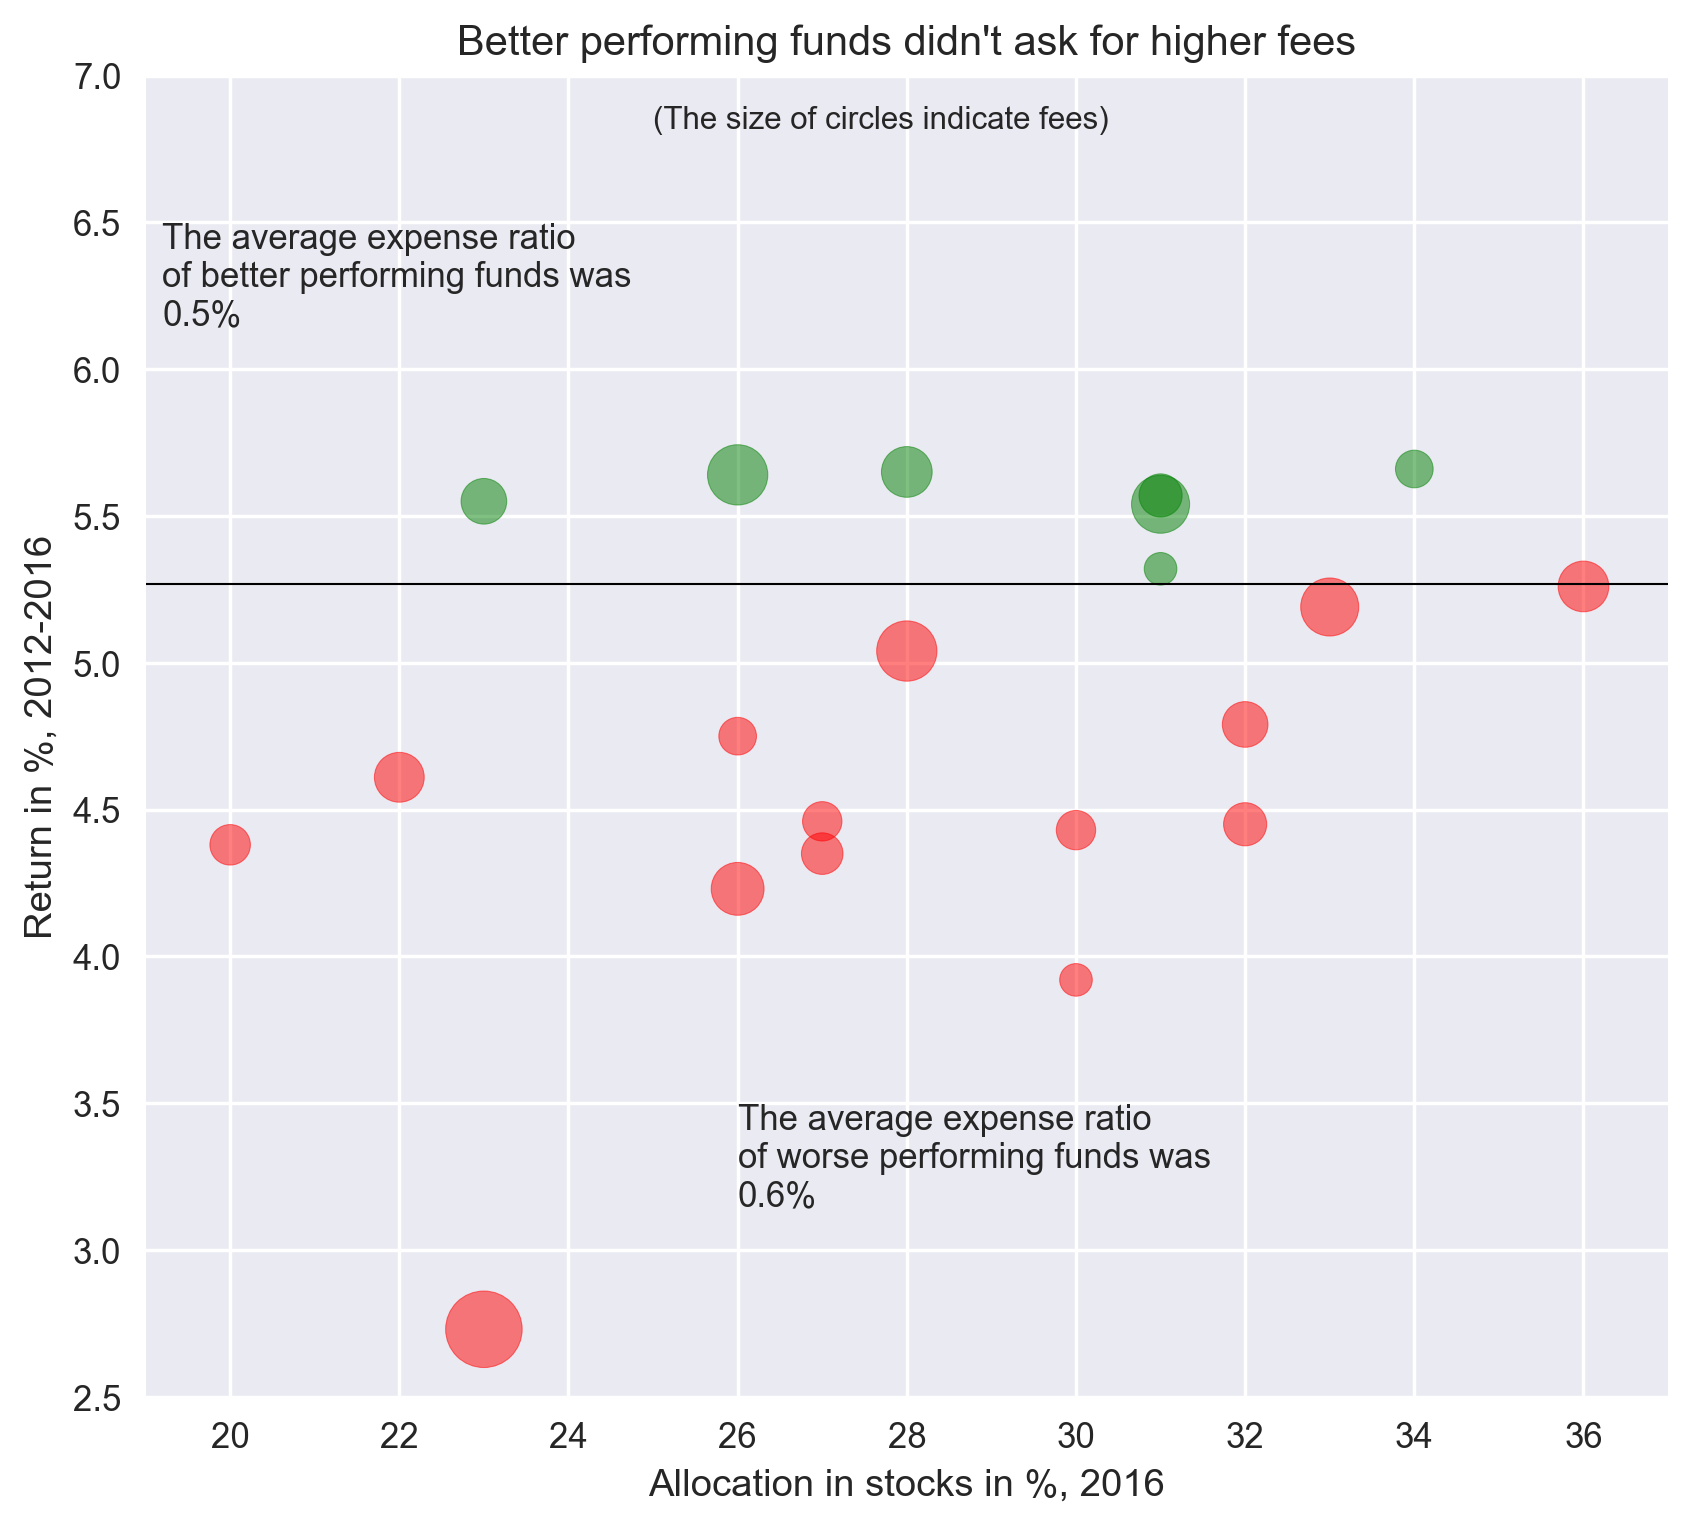

In [233]:
# allocation, returns and fees
# funds with higher than risk and lower return


costs = pf_data_current_with_return.TER_2016
mean_costs = pf_data_current_with_return.TER_2016.mean()

size_marker = (costs / mean_costs) * 200
mean1= pf_data_current_with_return.return_2012_2016

index_return = float(df_2016[df_2016["Pension_fund"]\
                       .str.contains("Pictet-Index 25")]\
                       ["return_2012_2016"].astype(float))
    
index_alloc = 25

this_data1 = pf_data_current_with_return\
[(pf_data_current_with_return.return_2012_2016.astype(float) > index_return)]

mean_costs1 = str(round(this_data1.TER_2016.mean(),1))

y1= this_data1.return_2012_2016
x1= this_data1.Stocks_2016


this_data2 = pf_data_current_with_return\
[(pf_data_current_with_return.return_2012_2016.astype(float) < index_return)]

mean_costs2 = str(round(this_data2.TER_2016.mean(),1))

y2= this_data2.return_2012_2016
x2= this_data2.Stocks_2016


fig, ax = plt.subplots(figsize=(7,7), dpi=250)


ax.set_xlim(19,37)
ax.set_ylim(2.5,7)

ax.set_ylabel("Return in %, 2012-2016")
ax.set_xlabel("Allocation in stocks in %, 2016")
ax.scatter(x1, y1, color="green", marker="o", s = size_marker, alpha=0.5, label = "Funds with higher return than the index")
ax.scatter(x2, y2, color="red", marker="o", s = size_marker, alpha=0.5, label = "Funds with lower return than the index")


ax.plot([15,40], [index_return,index_return], color = "black", linewidth = 0.6, label="Performance of index")

ax.text(19.2, 6.5,\
        "The average expense ratio\nof better performing funds was\n"+ mean_costs1 +"%",
        horizontalalignment='left',
        verticalalignment='top')


ax.text(26, 3.5,\
        "The average expense ratio\nof worse performing funds was\n"+ mean_costs2 +"%",
        horizontalalignment='left',
        verticalalignment='top')

plt.title("Better performing funds didn't ask for higher fees")

plt.figtext(.5,.85,'(The size of circles indicate fees)',fontsize=9,ha='center')

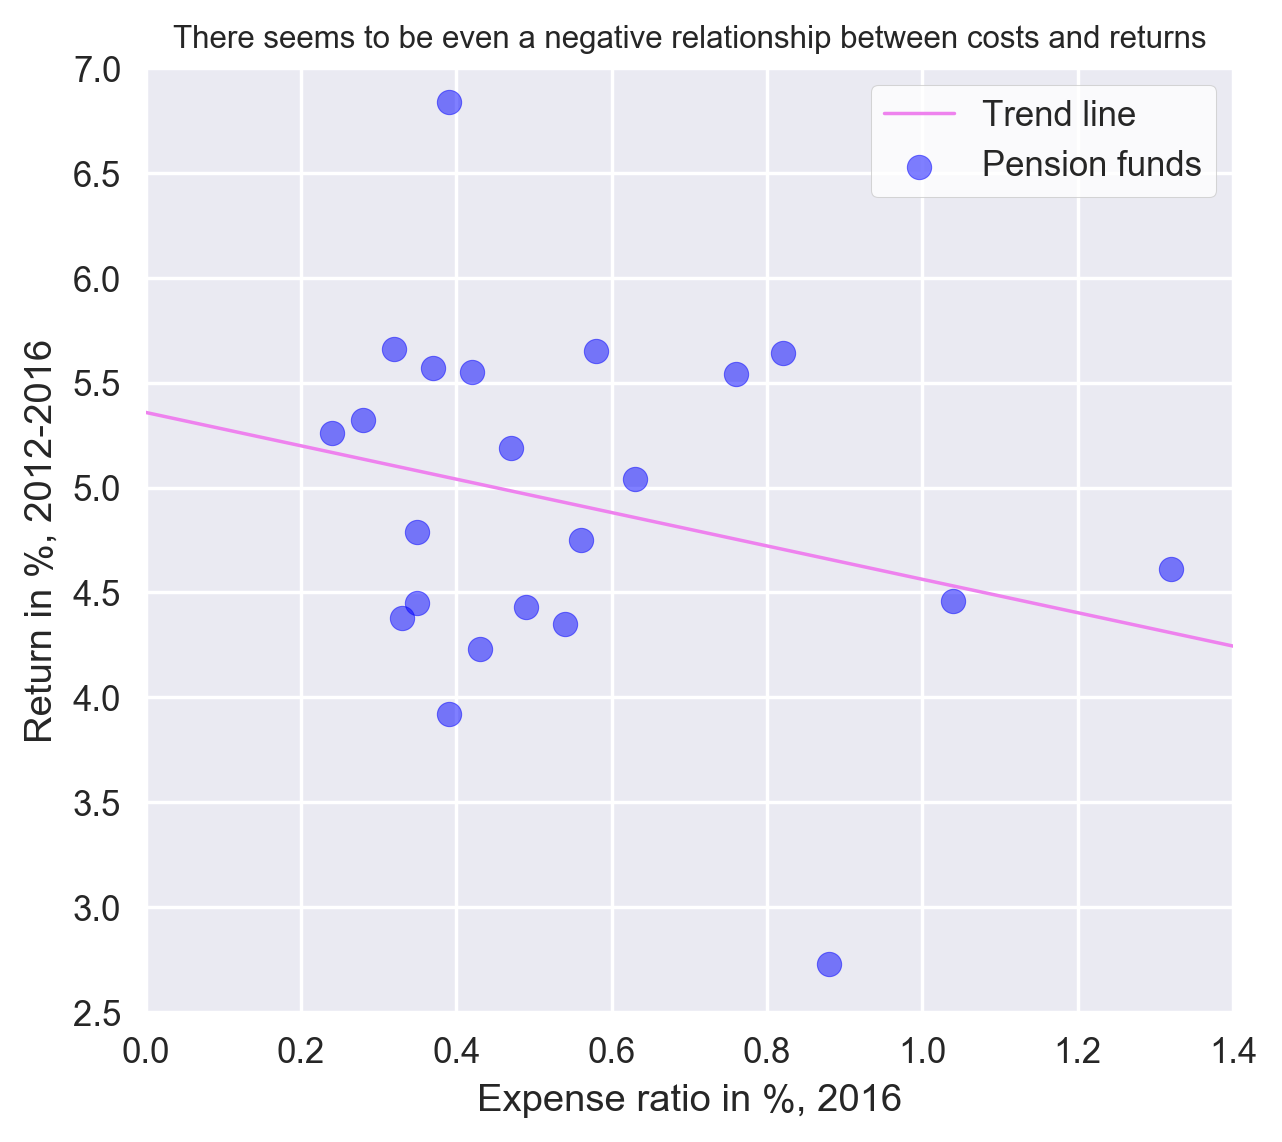

In [304]:
# compare costs and returns

#use only data with 2012 - 2016 returns
pf_data_current_with_return = pf_data_current[~pf_data_current.return_2012_2016.isnull()]

y= pf_data_current_with_return.return_2012_2016
x= pf_data_current_with_return.TER_2016
fig, ax = plt.subplots(figsize=(5,5), dpi=250)
fit = np.polyfit(x, y, deg=1)
ax.set_xlim(0,1.4)
ax.set_ylim(2.5,7)
ax.set_ylabel("Return in %, 2012-2016")
ax.set_xlabel("Expense ratio in %, 2016")
ax.scatter(x, y, color="blue", marker="o", label = "Pension funds", alpha = 0.5)
x_fit = np.arange(0,50)
y_fit = fit[1] + fit[0]*x_fit
ax.plot(x_fit, y_fit, color="violet", linewidth = 1, label = "Trend line")
plt.title("There seems to be even a negative relationship between costs and returns", fontsize=9)
legend = ax.legend(frameon = 1)
frame = legend.get_frame()
frame.set_facecolor('white')

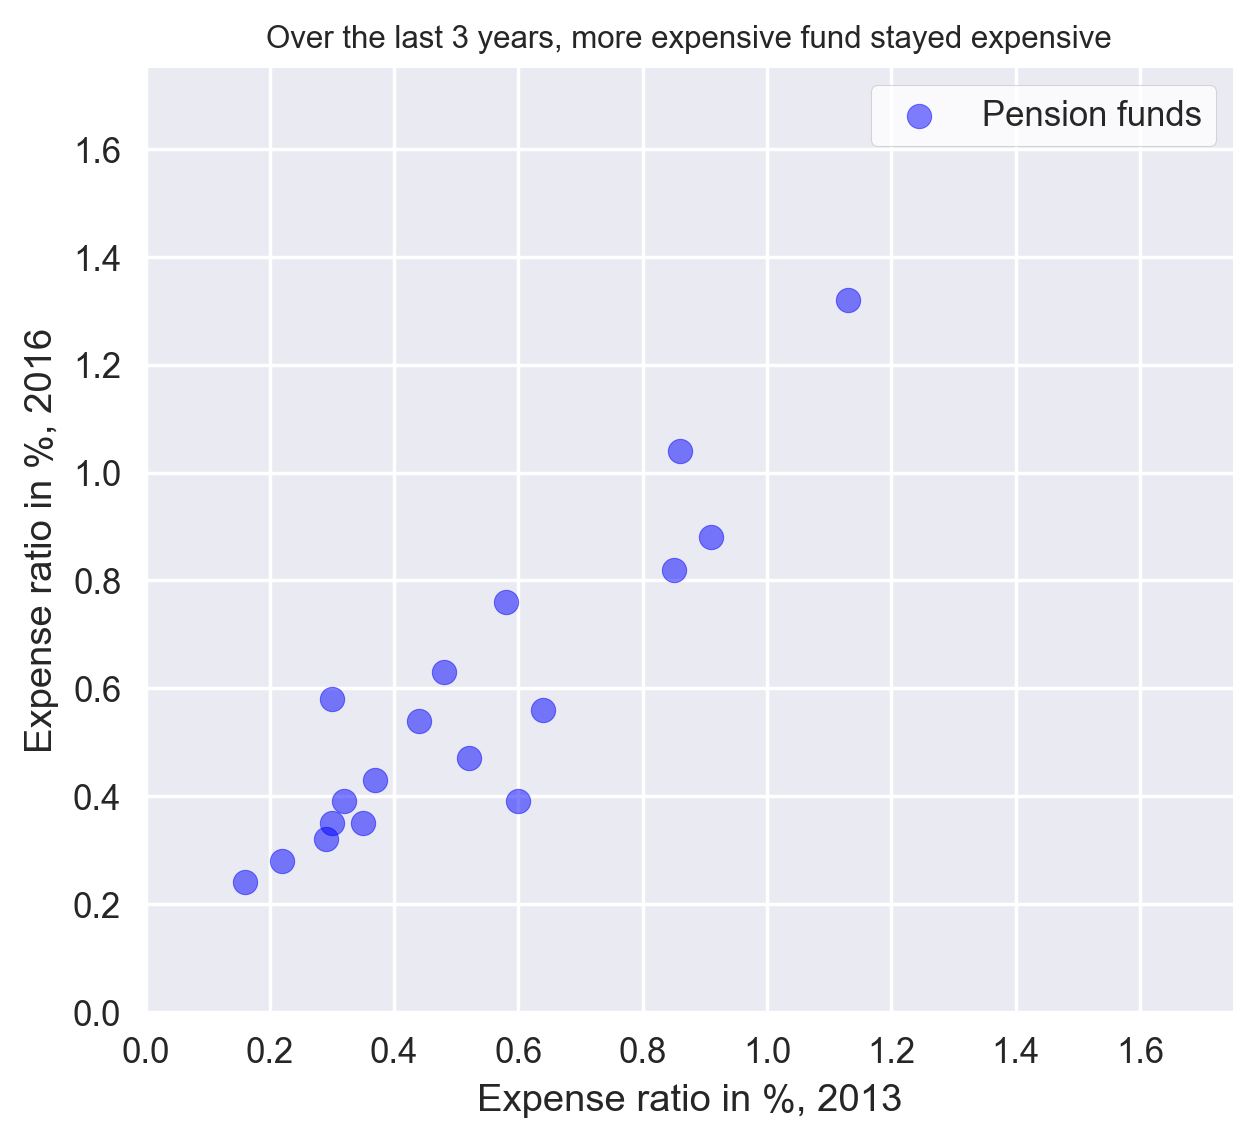

In [305]:
# compare cost changes
x= pf_data_historic.TER_2013
y= pf_data_historic.TER_2016
fig, ax = plt.subplots(figsize=(5,5), dpi=250)
fit = np.polyfit(x, y, deg=1)
ax.set_xlim(0,1.75)
ax.set_ylim(0,1.75)
ax.set_xlabel("Expense ratio in %, 2013")
ax.set_ylabel("Expense ratio in %, 2016")
ax.scatter(x, y, color="blue", marker="o", label = "Pension funds", alpha=0.5)
x_fit = np.arange(0,56)
y_fit = fit[1] + fit[0]*x_fit
#ax.plot(x_fit, x_fit, color="black", linewidth = 0.7)
plt.title("Over the last 3 years, more expensive fund stayed expensive", fontsize=9)
legend = ax.legend(frameon = 1)
frame = legend.get_frame()
frame.set_facecolor('white')

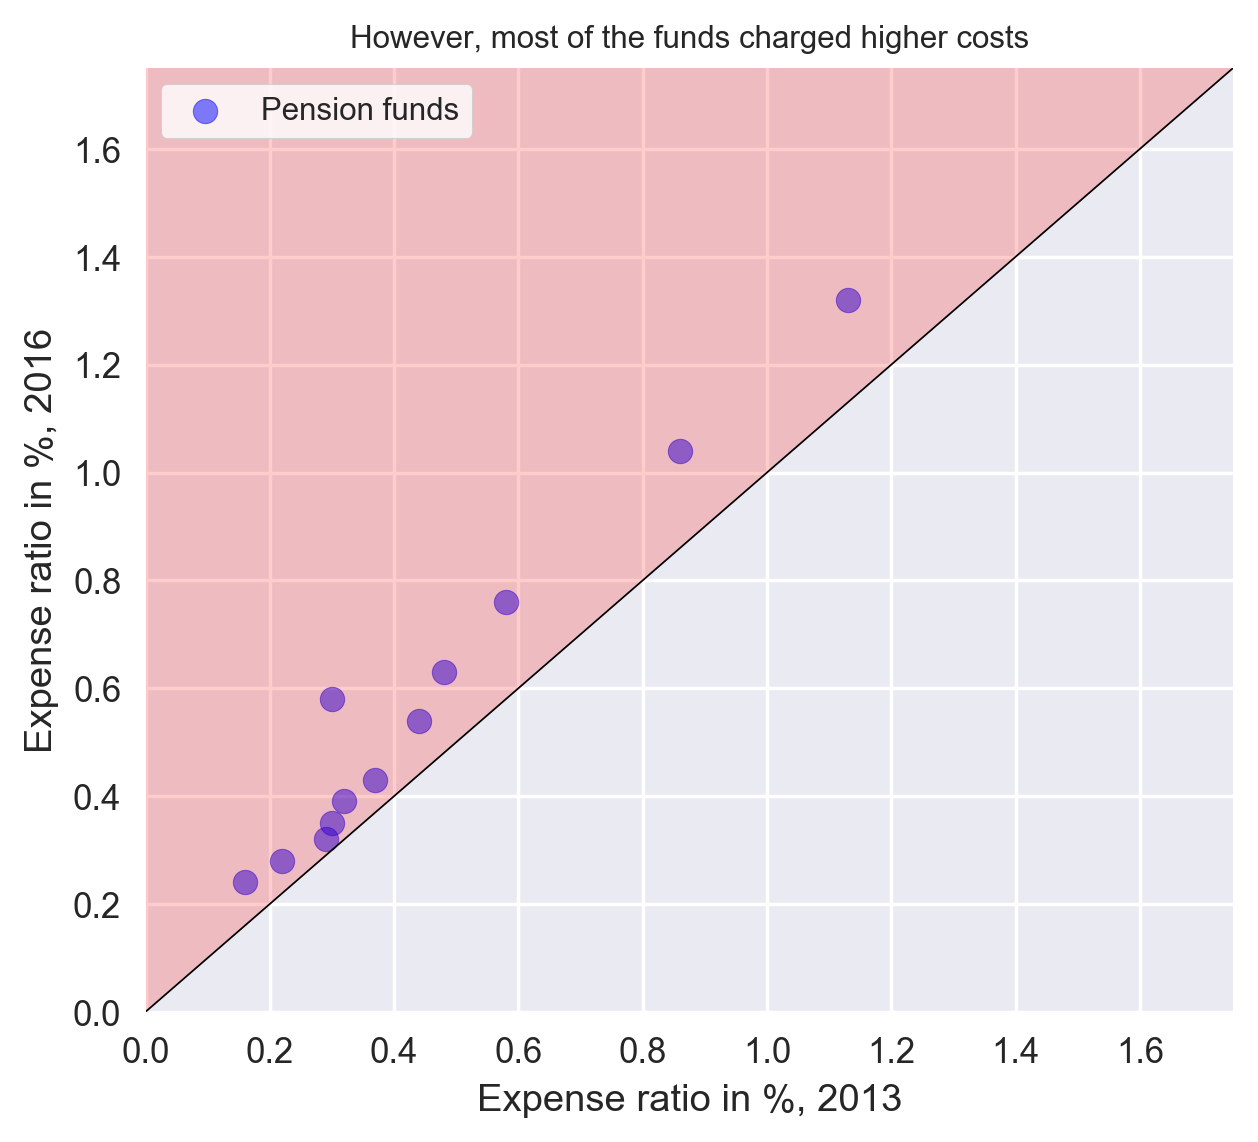

In [306]:
# compare cost changes

this_data = pf_data_historic[pf_data_historic.TER_2016 - pf_data_historic.TER_2013 > 0]
x= this_data.TER_2013
y= this_data.TER_2016
fig, ax = plt.subplots(figsize=(5,5), dpi=250)
fit = np.polyfit(x, y, deg=1)
ax.set_xlim(0,1.75)
ax.set_ylim(0,1.75)
ax.set_xlabel("Expense ratio in %, 2013")
ax.set_ylabel("Expense ratio in %, 2016")
ax.scatter(x, y, color="blue", marker="o", label = "Pension funds", alpha=0.5)
x_fit = np.arange(0,3)
y_fit = fit[1] + fit[0]*x_fit
ax.plot(x_fit, x_fit, color="black", linewidth = 0.5)

ax.fill_between([0,2], [0,2], [2,3], alpha=0.2, color = "red")

plt.title("However, most of the funds charged higher costs", fontsize=9)
legend = ax.legend(frameon = 1,fontsize=9)
frame = legend.get_frame()
frame.set_facecolor('white')

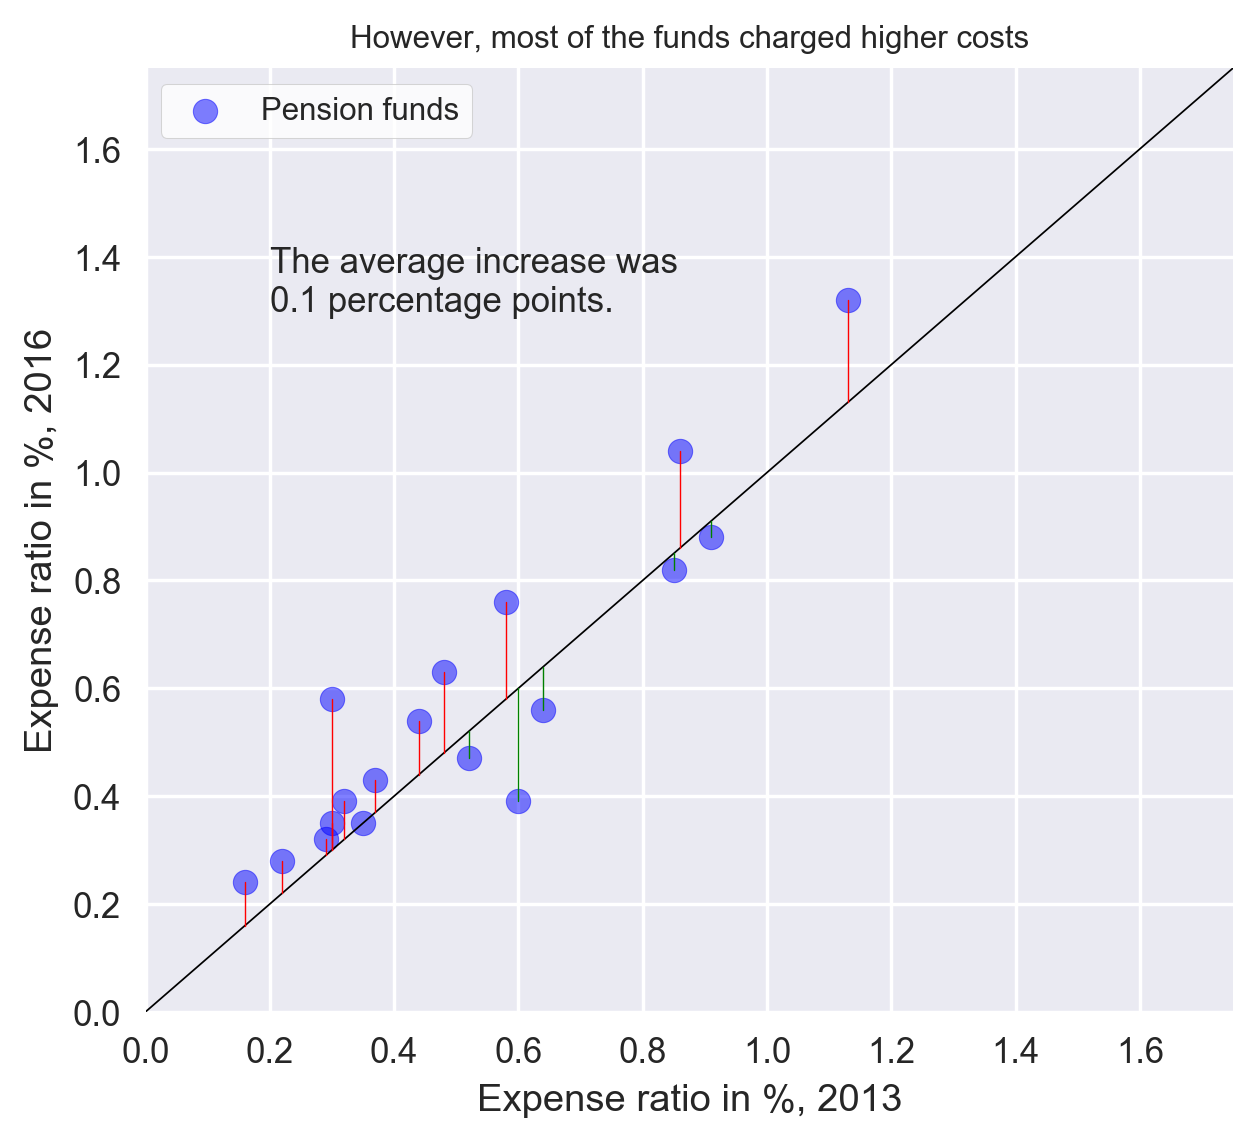

In [307]:
# compare cost changes

x= pf_data_historic.TER_2013
y= pf_data_historic.TER_2016
fig, ax = plt.subplots(figsize=(5,5), dpi=250)
fit = np.polyfit(x, y, deg=1)
ax.set_xlim(0,1.75)
ax.set_ylim(0,1.75)
ax.set_xlabel("Expense ratio in %, 2013")
ax.set_ylabel("Expense ratio in %, 2016")
ax.scatter(x, y, color="blue", marker="o", label = "Pension funds", alpha=0.5)
x_fit = np.arange(0,3)

cost_change = str(round(y.mean()-x.mean(),1))

ax.plot(x_fit, x_fit, color="black", linewidth = 0.5)

higher_costs_x = pf_data_historic[pf_data_historic.TER_2016 - pf_data_historic.TER_2013 > 0].TER_2013
higher_costs_y = pf_data_historic[pf_data_historic.TER_2016 - pf_data_historic.TER_2013 > 0].TER_2016
lower_costs_x = pf_data_historic[pf_data_historic.TER_2016 - pf_data_historic.TER_2013 < 0].TER_2013
lower_costs_y = pf_data_historic[pf_data_historic.TER_2016 - pf_data_historic.TER_2013 < 0].TER_2016

ax.plot([lower_costs_x,lower_costs_x],[lower_costs_x,lower_costs_y], color="green", linewidth = 0.4)
ax.plot([higher_costs_x,higher_costs_x],[higher_costs_x,higher_costs_y], color="red", linewidth = 0.4)


plt.title("However, most of the funds charged higher costs", fontsize=9)

ax.text(0.2,1.3,"The average increase was\n"+cost_change+" percentage points.")
legend = ax.legend(frameon = 1,fontsize=9)
frame = legend.get_frame()
frame.set_facecolor('white')

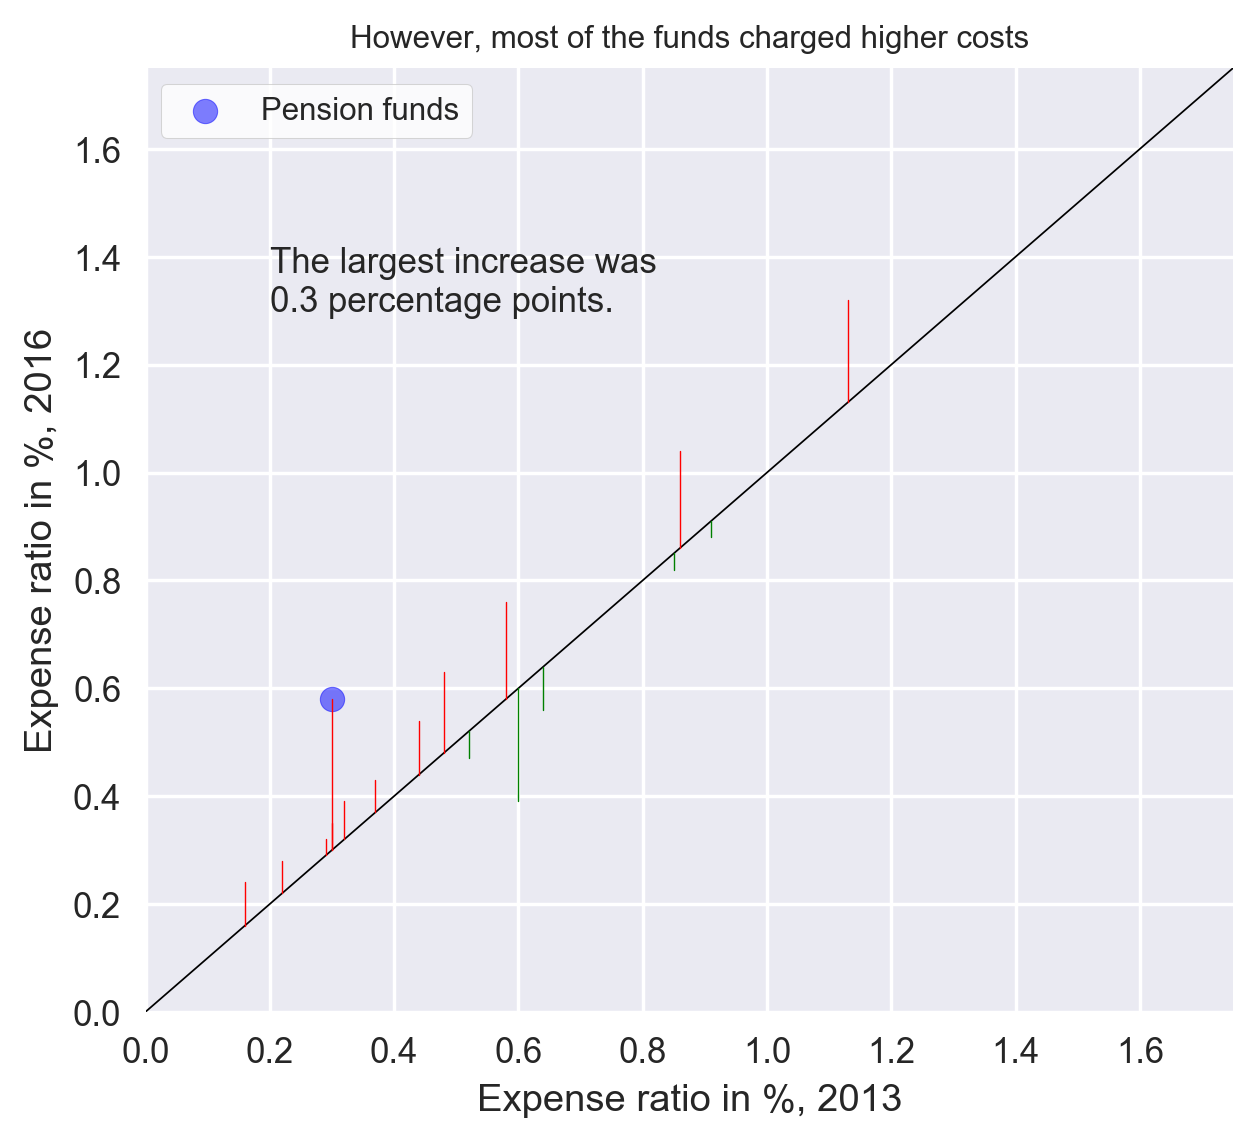

In [311]:
# compare cost changes

max_inc = max(pf_data_historic.TER_2016 - pf_data_historic.TER_2013)

max_inc_df = pf_data_historic[(pf_data_historic.TER_2016 - pf_data_historic.TER_2013) == max_inc]

x= max_inc_df.TER_2013
y= max_inc_df.TER_2016
fig, ax = plt.subplots(figsize=(5,5), dpi=250)

ax.set_xlim(0,1.75)
ax.set_ylim(0,1.75)
ax.set_xlabel("Expense ratio in %, 2013")
ax.set_ylabel("Expense ratio in %, 2016")
ax.scatter(x, y, color="blue", marker="o", label = "Pension funds", alpha=0.5)
x_fit = np.arange(0,3)

cost_change = str(round(y.mean()-x.mean(),1))

ax.plot(x_fit, x_fit, color="black", linewidth = 0.5)

higher_costs_x = pf_data_historic[pf_data_historic.TER_2016 - pf_data_historic.TER_2013 > 0].TER_2013
higher_costs_y = pf_data_historic[pf_data_historic.TER_2016 - pf_data_historic.TER_2013 > 0].TER_2016
lower_costs_x = pf_data_historic[pf_data_historic.TER_2016 - pf_data_historic.TER_2013 < 0].TER_2013
lower_costs_y = pf_data_historic[pf_data_historic.TER_2016 - pf_data_historic.TER_2013 < 0].TER_2016

ax.plot([lower_costs_x,lower_costs_x],[lower_costs_x,lower_costs_y], color="green", linewidth = 0.4)
ax.plot([higher_costs_x,higher_costs_x],[higher_costs_x,higher_costs_y], color="red", linewidth = 0.4)


plt.title("However, most of the funds charged higher costs", fontsize=9)

ax.text(0.2,1.3,"The largest increase was\n"+cost_change+" percentage points.")
legend = ax.legend(frameon = 1,fontsize=9)
frame = legend.get_frame()
frame.set_facecolor('white')